In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from numpy import genfromtxt
import sqlalchemy as db
from sqlalchemy import create_engine , MetaData,Table,Integer,Float,Column,String,delete
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.orm import sessionmaker
from sqlalchemy_utils import database_exists, create_database

In [2]:
def Load_Data(file_name):
    data = genfromtxt(file_name, delimiter=',', skip_header=1)
    return data.tolist()
Base = declarative_base()

In [3]:
class Train_data(Base):
    #Tell SQLAlchemy what the table name is and if there's any table-specific arguments it should know about
    __tablename__ = 'Train_data'
    __table_args__ = {'sqlite_autoincrement': True}
    #tell SQLAlchemy the name of column and its attributes:
    id = Column(Integer, primary_key=True, nullable=False) 
    X = Column(Integer)
    Y1 = Column(Integer)
    Y2 = Column(Integer)
    Y3 = Column(Integer)
    Y4 = Column(Integer)

In [4]:
class Test_data(Base):
    #Tell SQLAlchemy what the table name is and if there's any table-specific arguments it should know about
    __tablename__ = 'Test_data'
    __table_args__ = {'sqlite_autoincrement': True}
    #tell SQLAlchemy the name of column and its attributes:
    id = Column(Integer, primary_key=True, nullable=False) 
    X = Column(Integer)
    Y = Column(Integer)


In [5]:
class Test_Table(Base):
    #Tell SQLAlchemy what the table name is and if there's any table-specific arguments it should know about
    __tablename__ = 'Test_Table'
    __table_args__ = {'sqlite_autoincrement': True}
    #tell SQLAlchemy the name of column and its attributes:
    id = Column(Integer, primary_key=True, nullable=False) 
    X = Column(Float)
    Y = Column(Float)
    y_Dev=Column(Float)
    y_No=Column(String)


In [6]:
class Ideal_data(Base):
    #Tell SQLAlchemy what the table name is and if there's any table-specific arguments it should know about
    __tablename__ = 'Ideal_data'
    __table_args__ = {'sqlite_autoincrement': True}
    #tell SQLAlchemy the name of column and its attributes:
    id = Column(Integer, primary_key=True, nullable=False) 
    X = Column(Integer)
    Y1 = Column(Integer)
    Y2 = Column(Integer)
    Y3 = Column(Integer)
    Y4 = Column(Integer)   
    Y5 = Column(Integer)
    Y6 = Column(Integer)
    Y7 = Column(Integer)
    Y8 = Column(Integer)  
    Y9 = Column(Integer)
    Y10 = Column(Integer)
    Y11 = Column(Integer)
    Y12 = Column(Integer)   
    Y13 = Column(Integer)
    Y14 = Column(Integer)
    Y15 = Column(Integer)
    Y16 = Column(Integer) 
    Y17 = Column(Integer)
    Y18 = Column(Integer)
    Y19 = Column(Integer)
    Y20 = Column(Integer)   
    Y21 = Column(Integer)
    Y22 = Column(Integer)
    Y23 = Column(Integer)
    Y24 = Column(Integer) 
    Y25 = Column(Integer)
    Y26 = Column(Integer)
    Y27 = Column(Integer)   
    Y28 = Column(Integer)
    Y29 = Column(Integer)
    Y30 = Column(Integer)
    Y31 = Column(Integer) 
    Y32 = Column(Integer)
    Y33 = Column(Integer)
    Y34 = Column(Integer)
    Y35 = Column(Integer)   
    Y36 = Column(Integer)
    Y37 = Column(Integer)
    Y38 = Column(Integer)
    Y39 = Column(Integer) 
    Y40 = Column(Integer)
    Y41 = Column(Integer)
    Y42 = Column(Integer)   
    Y43 = Column(Integer)
    Y44 = Column(Integer)
    Y45 = Column(Integer)
    Y46 = Column(Integer) 
    Y47 = Column(Integer)
    Y48 = Column(Integer)
    Y49 = Column(Integer)
    Y50 = Column(Integer)   

In [7]:
engine = db.create_engine('sqlite:///MyPyProject.db', echo = True)
if not database_exists(engine.url):
    create_database(engine.url)

print(database_exists(engine.url))
meta = MetaData()
Base.metadata.create_all(engine)
session = sessionmaker()
session.configure(bind=engine)
s = session()

True
2021-11-19 13:29:23,656 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-11-19 13:29:23,661 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("Train_data")
2021-11-19 13:29:23,663 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-11-19 13:29:23,667 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("Test_data")
2021-11-19 13:29:23,668 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-11-19 13:29:23,671 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("Test_Table")
2021-11-19 13:29:23,672 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-11-19 13:29:23,675 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("Ideal_data")
2021-11-19 13:29:23,676 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-11-19 13:29:23,680 INFO sqlalchemy.engine.Engine COMMIT


In [8]:
def exists(table) :
    try:
         engine.execute("SELECT * FROM " + table)
         return True
    except:
         return False
    


In [9]:

if exists('Test_table') :
	engine.execute('delete from "Test_table"')

2021-11-19 13:29:26,427 INFO sqlalchemy.engine.Engine SELECT * FROM Test_table
2021-11-19 13:29:26,428 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-11-19 13:29:26,432 INFO sqlalchemy.engine.Engine delete from "Test_table"
2021-11-19 13:29:26,433 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-11-19 13:29:26,437 INFO sqlalchemy.engine.Engine COMMIT


In [10]:
if exists('Train_data') :
	engine.execute('delete from "Train_data"')

# loading train dataset into Train_data table
engine.execute('delete from "Train_data"')
try:
    file_name = "../train.csv"
    data = Load_Data(file_name) 
    for i in data:
        
        record = Train_data(**{
            'X' : i[0],
            'Y1' : i[1],
            'Y2' : i[2],
            'Y3' : i[3],
            'Y4' : i[4]
        })
        s.add(record) #Add all the records

    s.commit() #Attempt to commit all the records

except:
    s.rollback() #Rollback the changes on error
finally:
    s.close() 


2021-11-19 13:29:28,234 INFO sqlalchemy.engine.Engine SELECT * FROM Train_data
2021-11-19 13:29:28,236 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-11-19 13:29:28,240 INFO sqlalchemy.engine.Engine delete from "Train_data"
2021-11-19 13:29:28,241 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-11-19 13:29:28,245 INFO sqlalchemy.engine.Engine COMMIT
2021-11-19 13:29:28,251 INFO sqlalchemy.engine.Engine delete from "Train_data"
2021-11-19 13:29:28,252 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-11-19 13:29:28,255 INFO sqlalchemy.engine.Engine COMMIT
2021-11-19 13:29:28,324 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-11-19 13:29:28,335 INFO sqlalchemy.engine.Engine INSERT INTO "Train_data" ("X", "Y1", "Y2", "Y3", "Y4") VALUES (?, ?, ?, ?, ?)
2021-11-19 13:29:28,336 INFO sqlalchemy.engine.Engine [generated in 0.00102s] (-20.0, 288.5814, -0.98855585, -5831.869, 0.44324064)
2021-11-19 13:29:28,341 INFO sqlalchemy.engine.Engine INSERT INTO "Train_data" ("X", "Y1", "Y2", "Y3", "Y

2021-11-19 13:29:28,457 INFO sqlalchemy.engine.Engine [cached since 0.1221s ago] (-17.2, 202.02412, 0.048479386, -3511.9133, -0.69147646)
2021-11-19 13:29:28,458 INFO sqlalchemy.engine.Engine INSERT INTO "Train_data" ("X", "Y1", "Y2", "Y3", "Y4") VALUES (?, ?, ?, ?, ?)
2021-11-19 13:29:28,460 INFO sqlalchemy.engine.Engine [cached since 0.1254s ago] (-17.1, 199.11404, -0.5706783, -3443.3147, -0.50415367)
2021-11-19 13:29:28,462 INFO sqlalchemy.engine.Engine INSERT INTO "Train_data" ("X", "Y1", "Y2", "Y3", "Y4") VALUES (?, ?, ?, ?, ?)
2021-11-19 13:29:28,464 INFO sqlalchemy.engine.Engine [cached since 0.1297s ago] (-17.0, 196.06133, 0.40146238, -3374.6748, -0.72075)
2021-11-19 13:29:28,472 INFO sqlalchemy.engine.Engine INSERT INTO "Train_data" ("X", "Y1", "Y2", "Y3", "Y4") VALUES (?, ?, ?, ?, ?)
2021-11-19 13:29:28,479 INFO sqlalchemy.engine.Engine [cached since 0.144s ago] (-16.9, 192.75826, 0.14228645, -3308.169, -0.6588986)
2021-11-19 13:29:28,481 INFO sqlalchemy.engine.Engine INSERT 

2021-11-19 13:29:28,605 INFO sqlalchemy.engine.Engine [cached since 0.2705s ago] (-14.1, 123.39753, -0.79441416, -1771.5542, 1.2274079)
2021-11-19 13:29:28,608 INFO sqlalchemy.engine.Engine INSERT INTO "Train_data" ("X", "Y1", "Y2", "Y3", "Y4") VALUES (?, ?, ?, ?, ?)
2021-11-19 13:29:28,611 INFO sqlalchemy.engine.Engine [cached since 0.2757s ago] (-14.0, 120.59438, 1.438774, -1727.8873, 0.9034407)
2021-11-19 13:29:28,613 INFO sqlalchemy.engine.Engine INSERT INTO "Train_data" ("X", "Y1", "Y2", "Y3", "Y4") VALUES (?, ?, ?, ?, ?)
2021-11-19 13:29:28,615 INFO sqlalchemy.engine.Engine [cached since 0.2799s ago] (-13.9, 118.691345, -0.8741473, -1685.031, 0.89570576)
2021-11-19 13:29:28,617 INFO sqlalchemy.engine.Engine INSERT INTO "Train_data" ("X", "Y1", "Y2", "Y3", "Y4") VALUES (?, ?, ?, ?, ?)
2021-11-19 13:29:28,618 INFO sqlalchemy.engine.Engine [cached since 0.2836s ago] (-13.8, 116.33519, 0.8723481, -1643.2463, 0.8047461)
2021-11-19 13:29:28,620 INFO sqlalchemy.engine.Engine INSERT INTO

2021-11-19 13:29:28,707 INFO sqlalchemy.engine.Engine [cached since 0.3716s ago] (-11.0, 63.542393, 1.1894662, -729.2401, -1.3214113)
2021-11-19 13:29:28,709 INFO sqlalchemy.engine.Engine INSERT INTO "Train_data" ("X", "Y1", "Y2", "Y3", "Y4") VALUES (?, ?, ?, ?, ?)
2021-11-19 13:29:28,710 INFO sqlalchemy.engine.Engine [cached since 0.3751s ago] (-10.9, 62.68735, -0.05143134, -704.72284, -1.4493662)
2021-11-19 13:29:28,713 INFO sqlalchemy.engine.Engine INSERT INTO "Train_data" ("X", "Y1", "Y2", "Y3", "Y4") VALUES (?, ?, ?, ?, ?)
2021-11-19 13:29:28,714 INFO sqlalchemy.engine.Engine [cached since 0.3793s ago] (-10.8, 60.776302, -0.8000511, -681.2196, -1.0105668)
2021-11-19 13:29:28,716 INFO sqlalchemy.engine.Engine INSERT INTO "Train_data" ("X", "Y1", "Y2", "Y3", "Y4") VALUES (?, ?, ?, ?, ?)
2021-11-19 13:29:28,717 INFO sqlalchemy.engine.Engine [cached since 0.3822s ago] (-10.7, 59.522686, 1.3923697, -658.41046, -1.4432915)
2021-11-19 13:29:28,719 INFO sqlalchemy.engine.Engine INSERT INT

2021-11-19 13:29:28,804 INFO sqlalchemy.engine.Engine [cached since 0.4694s ago] (-7.9, 23.630775, -0.81249475, -205.04475, 0.63969326)
2021-11-19 13:29:28,806 INFO sqlalchemy.engine.Engine INSERT INTO "Train_data" ("X", "Y1", "Y2", "Y3", "Y4") VALUES (?, ?, ?, ?, ?)
2021-11-19 13:29:28,807 INFO sqlalchemy.engine.Engine [cached since 0.472s ago] (-7.8, 22.661198, -1.3220115, -195.58054, 1.2015266)
2021-11-19 13:29:28,808 INFO sqlalchemy.engine.Engine INSERT INTO "Train_data" ("X", "Y1", "Y2", "Y3", "Y4") VALUES (?, ?, ?, ?, ?)
2021-11-19 13:29:28,809 INFO sqlalchemy.engine.Engine [cached since 0.4743s ago] (-7.7, 21.883457, 0.16059445, -185.52101, 1.2500864)
2021-11-19 13:29:28,810 INFO sqlalchemy.engine.Engine INSERT INTO "Train_data" ("X", "Y1", "Y2", "Y3", "Y4") VALUES (?, ?, ?, ?, ?)
2021-11-19 13:29:28,812 INFO sqlalchemy.engine.Engine [cached since 0.4769s ago] (-7.6, 20.993467, 1.189252, -175.60648, 1.2448636)
2021-11-19 13:29:28,814 INFO sqlalchemy.engine.Engine INSERT INTO "Tr

2021-11-19 13:29:28,894 INFO sqlalchemy.engine.Engine [cached since 0.559s ago] (-4.8, 3.4266222, -1.1244736, -22.267006, -1.2985613)
2021-11-19 13:29:28,896 INFO sqlalchemy.engine.Engine INSERT INTO "Train_data" ("X", "Y1", "Y2", "Y3", "Y4") VALUES (?, ?, ?, ?, ?)
2021-11-19 13:29:28,898 INFO sqlalchemy.engine.Engine [cached since 0.5629s ago] (-4.7, 2.9683492, 0.18496004, -20.135778, -1.3566748)
2021-11-19 13:29:28,899 INFO sqlalchemy.engine.Engine INSERT INTO "Train_data" ("X", "Y1", "Y2", "Y3", "Y4") VALUES (?, ?, ?, ?, ?)
2021-11-19 13:29:28,901 INFO sqlalchemy.engine.Engine [cached since 0.5658s ago] (-4.6, 2.2985644, 0.2622421, -18.03123, -1.082232)
2021-11-19 13:29:28,902 INFO sqlalchemy.engine.Engine INSERT INTO "Train_data" ("X", "Y1", "Y2", "Y3", "Y4") VALUES (?, ?, ?, ?, ?)
2021-11-19 13:29:28,903 INFO sqlalchemy.engine.Engine [cached since 0.5681s ago] (-4.5, 2.1581566, 1.1338161, -15.162563, -0.91392726)
2021-11-19 13:29:28,904 INFO sqlalchemy.engine.Engine INSERT INTO "T

2021-11-19 13:29:29,023 INFO sqlalchemy.engine.Engine [cached since 0.6888s ago] (-1.7, 1.7307614, 0.66157717, 0.054489806, 1.3894719)
2021-11-19 13:29:29,025 INFO sqlalchemy.engine.Engine INSERT INTO "Train_data" ("X", "Y1", "Y2", "Y3", "Y4") VALUES (?, ?, ?, ?, ?)
2021-11-19 13:29:29,026 INFO sqlalchemy.engine.Engine [cached since 0.6916s ago] (-1.6, 1.531304, 0.25251195, 0.2313365, 1.1124535)
2021-11-19 13:29:29,027 INFO sqlalchemy.engine.Engine INSERT INTO "Train_data" ("X", "Y1", "Y2", "Y3", "Y4") VALUES (?, ?, ?, ?, ?)
2021-11-19 13:29:29,028 INFO sqlalchemy.engine.Engine [cached since 0.6942s ago] (-1.5, 2.3989048, 0.83264863, -0.056555703, 0.79860103)
2021-11-19 13:29:29,034 INFO sqlalchemy.engine.Engine INSERT INTO "Train_data" ("X", "Y1", "Y2", "Y3", "Y4") VALUES (?, ?, ?, ?, ?)
2021-11-19 13:29:29,035 INFO sqlalchemy.engine.Engine [cached since 0.7012s ago] (-1.4, 3.011806, 0.7510458, 0.4877231, 1.3213458)
2021-11-19 13:29:29,037 INFO sqlalchemy.engine.Engine INSERT INTO "Tr

2021-11-19 13:29:29,144 INFO sqlalchemy.engine.Engine [cached since 0.8099s ago] (1.4, 18.980717, 0.49454716, 39.244823, 1.4079416)
2021-11-19 13:29:29,146 INFO sqlalchemy.engine.Engine INSERT INTO "Train_data" ("X", "Y1", "Y2", "Y3", "Y4") VALUES (?, ?, ?, ?, ?)
2021-11-19 13:29:29,148 INFO sqlalchemy.engine.Engine [cached since 0.8138s ago] (1.5, 20.606617, 0.55195516, 42.481533, 0.79060453)
2021-11-19 13:29:29,150 INFO sqlalchemy.engine.Engine INSERT INTO "Train_data" ("X", "Y1", "Y2", "Y3", "Y4") VALUES (?, ?, ?, ?, ?)
2021-11-19 13:29:29,152 INFO sqlalchemy.engine.Engine [cached since 0.8175s ago] (1.6, 21.326912, 0.37455094, 46.80061, 1.2626967)
2021-11-19 13:29:29,153 INFO sqlalchemy.engine.Engine INSERT INTO "Train_data" ("X", "Y1", "Y2", "Y3", "Y4") VALUES (?, ?, ?, ?, ?)
2021-11-19 13:29:29,154 INFO sqlalchemy.engine.Engine [cached since 0.8198s ago] (1.7, 21.91726, -0.10482704, 50.637512, 1.1820289)
2021-11-19 13:29:29,155 INFO sqlalchemy.engine.Engine INSERT INTO "Train_dat

2021-11-19 13:29:29,239 INFO sqlalchemy.engine.Engine [cached since 0.9046s ago] (4.5, 56.540295, 1.2561252, 274.59708, -1.3371099)
2021-11-19 13:29:29,241 INFO sqlalchemy.engine.Engine INSERT INTO "Train_data" ("X", "Y1", "Y2", "Y3", "Y4") VALUES (?, ?, ?, ?, ?)
2021-11-19 13:29:29,242 INFO sqlalchemy.engine.Engine [cached since 0.9079s ago] (4.6, 57.547142, 0.77388275, 287.49493, -0.688762)
2021-11-19 13:29:29,244 INFO sqlalchemy.engine.Engine INSERT INTO "Train_data" ("X", "Y1", "Y2", "Y3", "Y4") VALUES (?, ?, ?, ?, ?)
2021-11-19 13:29:29,245 INFO sqlalchemy.engine.Engine [cached since 0.9108s ago] (4.7, 59.565914, -0.5701132, 301.14636, -1.372828)
2021-11-19 13:29:29,246 INFO sqlalchemy.engine.Engine INSERT INTO "Train_data" ("X", "Y1", "Y2", "Y3", "Y4") VALUES (?, ?, ?, ?, ?)
2021-11-19 13:29:29,249 INFO sqlalchemy.engine.Engine [cached since 0.9147s ago] (4.8, 61.094326, -0.9345439, 314.17044, -1.0382977)
2021-11-19 13:29:29,250 INFO sqlalchemy.engine.Engine INSERT INTO "Train_da

2021-11-19 13:29:29,339 INFO sqlalchemy.engine.Engine INSERT INTO "Train_data" ("X", "Y1", "Y2", "Y3", "Y4") VALUES (?, ?, ?, ?, ?)
2021-11-19 13:29:29,340 INFO sqlalchemy.engine.Engine [cached since 1.005s ago] (7.7, 114.26722, 0.83819926, 912.6666, 1.0884265)
2021-11-19 13:29:29,341 INFO sqlalchemy.engine.Engine INSERT INTO "Train_data" ("X", "Y1", "Y2", "Y3", "Y4") VALUES (?, ?, ?, ?, ?)
2021-11-19 13:29:29,342 INFO sqlalchemy.engine.Engine [cached since 1.008s ago] (7.8, 116.70905, -0.6965696, 940.92487, 0.882537)
2021-11-19 13:29:29,343 INFO sqlalchemy.engine.Engine INSERT INTO "Train_data" ("X", "Y1", "Y2", "Y3", "Y4") VALUES (?, ?, ?, ?, ?)
2021-11-19 13:29:29,344 INFO sqlalchemy.engine.Engine [cached since 1.01s ago] (7.9, 118.8932, -0.34915045, 969.9849, 1.194977)
2021-11-19 13:29:29,345 INFO sqlalchemy.engine.Engine INSERT INTO "Train_data" ("X", "Y1", "Y2", "Y3", "Y4") VALUES (?, ?, ?, ?, ?)
2021-11-19 13:29:29,347 INFO sqlalchemy.engine.Engine [cached since 1.013s ago] (8.0

2021-11-19 13:29:29,454 INFO sqlalchemy.engine.Engine [cached since 1.12s ago] (10.8, 190.50601, -0.119706966, 2097.2986, -0.7519424)
2021-11-19 13:29:29,456 INFO sqlalchemy.engine.Engine INSERT INTO "Train_data" ("X", "Y1", "Y2", "Y3", "Y4") VALUES (?, ?, ?, ?, ?)
2021-11-19 13:29:29,458 INFO sqlalchemy.engine.Engine [cached since 1.124s ago] (10.9, 193.18152, -0.7459015, 2146.845, -0.5036647)
2021-11-19 13:29:29,461 INFO sqlalchemy.engine.Engine INSERT INTO "Train_data" ("X", "Y1", "Y2", "Y3", "Y4") VALUES (?, ?, ?, ?, ?)
2021-11-19 13:29:29,463 INFO sqlalchemy.engine.Engine [cached since 1.128s ago] (11.0, 195.81107, 0.7729368, 2197.0913, -1.189107)
2021-11-19 13:29:29,464 INFO sqlalchemy.engine.Engine INSERT INTO "Train_data" ("X", "Y1", "Y2", "Y3", "Y4") VALUES (?, ?, ?, ?, ?)
2021-11-19 13:29:29,466 INFO sqlalchemy.engine.Engine [cached since 1.132s ago] (11.1, 199.12987, -0.8876498, 2248.5527, -0.5768607)
2021-11-19 13:29:29,468 INFO sqlalchemy.engine.Engine INSERT INTO "Train_d

2021-11-19 13:29:29,573 INFO sqlalchemy.engine.Engine INSERT INTO "Train_data" ("X", "Y1", "Y2", "Y3", "Y4") VALUES (?, ?, ?, ?, ?)
2021-11-19 13:29:29,576 INFO sqlalchemy.engine.Engine [cached since 1.241s ago] (14.0, 288.96915, 0.7759986, 4095.559, 0.69803977)
2021-11-19 13:29:29,580 INFO sqlalchemy.engine.Engine INSERT INTO "Train_data" ("X", "Y1", "Y2", "Y3", "Y4") VALUES (?, ?, ?, ?, ?)
2021-11-19 13:29:29,586 INFO sqlalchemy.engine.Engine [cached since 1.252s ago] (14.1, 292.34012, -0.70446897, 4173.471, 0.9665402)
2021-11-19 13:29:29,588 INFO sqlalchemy.engine.Engine INSERT INTO "Train_data" ("X", "Y1", "Y2", "Y3", "Y4") VALUES (?, ?, ?, ?, ?)
2021-11-19 13:29:29,589 INFO sqlalchemy.engine.Engine [cached since 1.254s ago] (14.2, 296.0181, 0.17041738, 4251.995, 0.74202156)
2021-11-19 13:29:29,591 INFO sqlalchemy.engine.Engine INSERT INTO "Train_data" ("X", "Y1", "Y2", "Y3", "Y4") VALUES (?, ?, ?, ?, ?)
2021-11-19 13:29:29,593 INFO sqlalchemy.engine.Engine [cached since 1.259s ago

2021-11-19 13:29:29,684 INFO sqlalchemy.engine.Engine [cached since 1.349s ago] (17.1, 404.37054, -0.40642238, 6968.289, -1.4431142)
2021-11-19 13:29:29,686 INFO sqlalchemy.engine.Engine INSERT INTO "Train_data" ("X", "Y1", "Y2", "Y3", "Y4") VALUES (?, ?, ?, ?, ?)
2021-11-19 13:29:29,688 INFO sqlalchemy.engine.Engine [cached since 1.353s ago] (17.2, 407.70285, 0.6639213, 7078.3286, -1.2933745)
2021-11-19 13:29:29,690 INFO sqlalchemy.engine.Engine INSERT INTO "Train_data" ("X", "Y1", "Y2", "Y3", "Y4") VALUES (?, ?, ?, ?, ?)
2021-11-19 13:29:29,691 INFO sqlalchemy.engine.Engine [cached since 1.356s ago] (17.3, 411.98477, -0.37865558, 7188.8447, -1.4916638)
2021-11-19 13:29:29,693 INFO sqlalchemy.engine.Engine INSERT INTO "Train_data" ("X", "Y1", "Y2", "Y3", "Y4") VALUES (?, ?, ?, ?, ?)
2021-11-19 13:29:29,694 INFO sqlalchemy.engine.Engine [cached since 1.36s ago] (17.4, 416.56067, 1.2924051, 7301.4414, -1.329126)
2021-11-19 13:29:29,695 INFO sqlalchemy.engine.Engine INSERT INTO "Train_da

In [11]:
if exists('Test_data') :
    engine.execute('delete from "Test_data"')

# loading the test.csv file into a Test_data table
try:
    file_name = "../test.csv"
    data = Load_Data(file_name) 
    for i in data:
        
        record = Test_data(**{
            'X' : i[0],
            'Y' : i[1],
        })
        s.add(record) #Add all the records

    s.commit() #Attempt to commit all the records
except Exception as e:
    s.rollback() #Rollback the changes on error
    print(e)
finally:
    s.close() 

2021-11-19 13:29:30,846 INFO sqlalchemy.engine.Engine SELECT * FROM Test_data
2021-11-19 13:29:30,847 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-11-19 13:29:30,851 INFO sqlalchemy.engine.Engine delete from "Test_data"
2021-11-19 13:29:30,852 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-11-19 13:29:30,857 INFO sqlalchemy.engine.Engine COMMIT
2021-11-19 13:29:30,870 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-11-19 13:29:30,874 INFO sqlalchemy.engine.Engine INSERT INTO "Test_data" ("X", "Y") VALUES (?, ?)
2021-11-19 13:29:30,875 INFO sqlalchemy.engine.Engine [generated in 0.00135s] (-18.2, -0.24138825)
2021-11-19 13:29:30,880 INFO sqlalchemy.engine.Engine INSERT INTO "Test_data" ("X", "Y") VALUES (?, ?)
2021-11-19 13:29:30,881 INFO sqlalchemy.engine.Engine [cached since 0.006679s ago] (-17.9, 221.71954)
2021-11-19 13:29:30,882 INFO sqlalchemy.engine.Engine INSERT INTO "Test_data" ("X", "Y") VALUES (?, ?)
2021-11-19 13:29:30,883 INFO sqlalchemy.engine.Engine [cached since 

2021-11-19 13:29:30,967 INFO sqlalchemy.engine.Engine [cached since 0.09403s ago] (-11.7, -913.2485)
2021-11-19 13:29:30,969 INFO sqlalchemy.engine.Engine INSERT INTO "Test_data" ("X", "Y") VALUES (?, ?)
2021-11-19 13:29:30,970 INFO sqlalchemy.engine.Engine [cached since 0.09652s ago] (-17.9, -605.24036)
2021-11-19 13:29:30,971 INFO sqlalchemy.engine.Engine INSERT INTO "Test_data" ("X", "Y") VALUES (?, ?)
2021-11-19 13:29:30,972 INFO sqlalchemy.engine.Engine [cached since 0.09919s ago] (10.9, 2245.5632)
2021-11-19 13:29:30,974 INFO sqlalchemy.engine.Engine INSERT INTO "Test_data" ("X", "Y") VALUES (?, ?)
2021-11-19 13:29:30,975 INFO sqlalchemy.engine.Engine [cached since 0.1018s ago] (17.3, 7189.7354)
2021-11-19 13:29:30,976 INFO sqlalchemy.engine.Engine INSERT INTO "Test_data" ("X", "Y") VALUES (?, ?)
2021-11-19 13:29:30,977 INFO sqlalchemy.engine.Engine [cached since 0.1041s ago] (2.2, 74.06183)
2021-11-19 13:29:30,979 INFO sqlalchemy.engine.Engine INSERT INTO "Test_data" ("X", "Y") 

2021-11-19 13:29:31,129 INFO sqlalchemy.engine.Engine [cached since 0.2556s ago] (0.2, 9.808731)
2021-11-19 13:29:31,130 INFO sqlalchemy.engine.Engine INSERT INTO "Test_data" ("X", "Y") VALUES (?, ?)
2021-11-19 13:29:31,131 INFO sqlalchemy.engine.Engine [cached since 0.258s ago] (9.2, -0.23851605)
2021-11-19 13:29:31,136 INFO sqlalchemy.engine.Engine INSERT INTO "Test_data" ("X", "Y") VALUES (?, ?)
2021-11-19 13:29:31,142 INFO sqlalchemy.engine.Engine [cached since 0.2689s ago] (-2.9, 0.5832357)
2021-11-19 13:29:31,144 INFO sqlalchemy.engine.Engine INSERT INTO "Test_data" ("X", "Y") VALUES (?, ?)
2021-11-19 13:29:31,145 INFO sqlalchemy.engine.Engine [cached since 0.2719s ago] (9.0, 0.7592143)
2021-11-19 13:29:31,147 INFO sqlalchemy.engine.Engine INSERT INTO "Test_data" ("X", "Y") VALUES (?, ?)
2021-11-19 13:29:31,149 INFO sqlalchemy.engine.Engine [cached since 0.2761s ago] (-15.8, -0.15983945)
2021-11-19 13:29:31,151 INFO sqlalchemy.engine.Engine INSERT INTO "Test_data" ("X", "Y") VALU

In [12]:
if exists('Ideal_data') :
    engine.execute('delete from "Ideal_data"')

# loading ideal.csv file into Ideal_data table
try:
    file_name = "../ideal.csv"
    data = Load_Data(file_name) 
    for i in data:
        
        record = Ideal_data(**{
            'X' : i[0],
            'Y1' : i[1],
            'Y2' : i[2],
            'Y3' : i[3],
            'Y4' : i[4],
            'Y5' : i[5],
            'Y6' : i[6],
            'Y7' : i[7],
            'Y8' : i[8],
            'Y9' : i[9],
            'Y10' : i[10],
            'Y11' : i[11],
            'Y12' : i[12],
            'Y13' : i[13],
            'Y14' : i[14],
            'Y15' : i[15],
            'Y16' : i[16],
            'Y17' : i[17],
            'Y18' : i[18],
            'Y19' : i[19],
            'Y20' : i[20],
            'Y21' : i[21],
            'Y22' : i[22],
            'Y23' : i[23],
            'Y24' : i[24],
            'Y25' : i[25],
            'Y26' : i[26],
            'Y27' : i[27],
            'Y28' : i[28],
            'Y29' : i[29],
            'Y30' : i[30],
            'Y31' : i[31],
            'Y32' : i[32],
            'Y33' : i[33],
            'Y34' : i[34],
            'Y35' : i[35],
            'Y36' : i[36],
            'Y37' : i[37],
            'Y38' : i[38],
            'Y39' : i[39],
            'Y40' : i[40],
            'Y41' : i[41],
            'Y42' : i[42],
            'Y43' : i[43],
            'Y44' : i[44],
            'Y45' : i[45],
            'Y46' : i[46],
            'Y47' : i[47],
            'Y48' : i[48],
            'Y49' : i[49],
            'Y50' : i[50],
        })
        s.add(record) #Add all the records

    s.commit() #Attempt to commit all the records
except Exception as e:
    s.rollback() #Rollback the changes on error
    print(e)
finally:
    s.close() 
    

2021-11-19 13:29:31,258 INFO sqlalchemy.engine.Engine SELECT * FROM Ideal_data
2021-11-19 13:29:31,261 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-11-19 13:29:31,267 INFO sqlalchemy.engine.Engine delete from "Ideal_data"
2021-11-19 13:29:31,269 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-11-19 13:29:31,276 INFO sqlalchemy.engine.Engine COMMIT
2021-11-19 13:29:31,546 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-11-19 13:29:31,595 INFO sqlalchemy.engine.Engine INSERT INTO "Ideal_data" ("X", "Y1", "Y2", "Y3", "Y4", "Y5", "Y6", "Y7", "Y8", "Y9", "Y10", "Y11", "Y12", "Y13", "Y14", "Y15", "Y16", "Y17", "Y18", "Y19", "Y20", "Y21", "Y22", "Y23", "Y24", "Y25", "Y26", "Y27", "Y28", "Y29", "Y30", "Y31", "Y32", "Y33", "Y34", "Y35", "Y36", "Y37", "Y38", "Y39", "Y40", "Y41", "Y42", "Y43", "Y44", "Y45", "Y46", "Y47", "Y48", "Y49", "Y50") VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?

2021-11-19 13:29:31,618 INFO sqlalchemy.engine.Engine INSERT INTO "Ideal_data" ("X", "Y1", "Y2", "Y3", "Y4", "Y5", "Y6", "Y7", "Y8", "Y9", "Y10", "Y11", "Y12", "Y13", "Y14", "Y15", "Y16", "Y17", "Y18", "Y19", "Y20", "Y21", "Y22", "Y23", "Y24", "Y25", "Y26", "Y27", "Y28", "Y29", "Y30", "Y31", "Y32", "Y33", "Y34", "Y35", "Y36", "Y37", "Y38", "Y39", "Y40", "Y41", "Y42", "Y43", "Y44", "Y45", "Y46", "Y47", "Y48", "Y49", "Y50") VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
2021-11-19 13:29:31,619 INFO sqlalchemy.engine.Engine [cached since 0.02436s ago] (-19.3, -0.43536535, 0.90025383, 9.564634, 5.900254, -9.564634, 0.43536535, -0.97474456, 0.97776526, 1.8005077, 8.402552, -19.3, -55.9, -43.6, 19.3, 12.65, 372.49, -372.49, 744.98, 382.49, 265.69, -7189.057, 7189.057, 7189.057, -14378.114, -21562.172, -5177.717, 9663.597, -7208.357, -6816.567, -7929.037, 19.3, 4.3931766, 19.42910

2021-11-19 13:29:31,642 INFO sqlalchemy.engine.Engine INSERT INTO "Ideal_data" ("X", "Y1", "Y2", "Y3", "Y4", "Y5", "Y6", "Y7", "Y8", "Y9", "Y10", "Y11", "Y12", "Y13", "Y14", "Y15", "Y16", "Y17", "Y18", "Y19", "Y20", "Y21", "Y22", "Y23", "Y24", "Y25", "Y26", "Y27", "Y28", "Y29", "Y30", "Y31", "Y32", "Y33", "Y34", "Y35", "Y36", "Y37", "Y38", "Y39", "Y40", "Y41", "Y42", "Y43", "Y44", "Y45", "Y46", "Y47", "Y48", "Y49", "Y50") VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
2021-11-19 13:29:31,643 INFO sqlalchemy.engine.Engine [cached since 0.04831s ago] (-18.6, 0.24697366, 0.9690222, 10.246974, 5.9690223, -10.246974, -0.24697366, -0.99222535, 0.3753813, 1.9380444, -4.59371, -18.6, -53.8, -42.2, 18.6, 12.3, 345.96, -345.96, 691.92, 355.96, 243.36, -6434.856, 6434.856, 6434.856, -12869.712, -19299.568, -4574.296, 8741.816, -6453.456, -6088.896, -7121.776, 18.6, 4.312772, 18.733927

2021-11-19 13:29:31,674 INFO sqlalchemy.engine.Engine INSERT INTO "Ideal_data" ("X", "Y1", "Y2", "Y3", "Y4", "Y5", "Y6", "Y7", "Y8", "Y9", "Y10", "Y11", "Y12", "Y13", "Y14", "Y15", "Y16", "Y17", "Y18", "Y19", "Y20", "Y21", "Y22", "Y23", "Y24", "Y25", "Y26", "Y27", "Y28", "Y29", "Y30", "Y31", "Y32", "Y33", "Y34", "Y35", "Y36", "Y37", "Y38", "Y39", "Y40", "Y41", "Y42", "Y43", "Y44", "Y45", "Y46", "Y47", "Y48", "Y49", "Y50") VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
2021-11-19 13:29:31,677 INFO sqlalchemy.engine.Engine [cached since 0.0825s ago] (-17.9, 0.81315714, 0.58204424, 10.813157, 5.582044, -10.813157, -0.81315714, -0.8893942, -0.032444973, 1.1640885, -14.555512, -17.9, -51.7, -40.8, 17.9, 11.95, 320.41, -320.41, 640.82, 330.41, 222.01, -5735.339, 5735.339, 5735.339, -11470.678, -17201.018, -4019.679, 7880.599, -5753.239, -5414.929, -6371.159, 17.9, 4.2308393, 18.0

2021-11-19 13:29:31,706 INFO sqlalchemy.engine.Engine INSERT INTO "Ideal_data" ("X", "Y1", "Y2", "Y3", "Y4", "Y5", "Y6", "Y7", "Y8", "Y9", "Y10", "Y11", "Y12", "Y13", "Y14", "Y15", "Y16", "Y17", "Y18", "Y19", "Y20", "Y21", "Y22", "Y23", "Y24", "Y25", "Y26", "Y27", "Y28", "Y29", "Y30", "Y31", "Y32", "Y33", "Y34", "Y35", "Y36", "Y37", "Y38", "Y39", "Y40", "Y41", "Y42", "Y43", "Y44", "Y45", "Y46", "Y47", "Y48", "Y49", "Y50") VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
2021-11-19 13:29:31,707 INFO sqlalchemy.engine.Engine [cached since 0.112s ago] (-17.2, 0.9969001, -0.0786782, 10.9969, 4.921322, -10.9969, -0.9969001, -0.67872006, 0.50578403, -0.1573564, -17.14668, -17.2, -49.6, -39.4, 17.2, 11.6, 295.84, -295.84, 591.68, 305.84, 201.64, -5088.448, 5088.448, 5088.448, -10176.896, -15260.344, -3511.808, 7077.888, -5105.648, -4792.608, -5675.128, 17.2, 4.1472883, 17.34474, 1.0

2021-11-19 13:29:31,738 INFO sqlalchemy.engine.Engine INSERT INTO "Ideal_data" ("X", "Y1", "Y2", "Y3", "Y4", "Y5", "Y6", "Y7", "Y8", "Y9", "Y10", "Y11", "Y12", "Y13", "Y14", "Y15", "Y16", "Y17", "Y18", "Y19", "Y20", "Y21", "Y22", "Y23", "Y24", "Y25", "Y26", "Y27", "Y28", "Y29", "Y30", "Y31", "Y32", "Y33", "Y34", "Y35", "Y36", "Y37", "Y38", "Y39", "Y40", "Y41", "Y42", "Y43", "Y44", "Y45", "Y46", "Y47", "Y48", "Y49", "Y50") VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
2021-11-19 13:29:31,740 INFO sqlalchemy.engine.Engine [cached since 0.1451s ago] (-16.5, 0.7117853, -0.70239705, 10.711785, 4.297603, -10.711785, -0.7117853, -0.38574794, 0.87650865, -1.4047941, -11.744458, -16.5, -47.5, -38.0, 16.5, 11.25, 272.25, -272.25, 544.5, 282.25, 182.25, -4492.125, 4492.125, 4492.125, -8984.25, -13471.375, -3048.625, 6331.625, -4508.625, -4219.875, -5031.625, 16.5, 4.0620193, 16.65082

2021-11-19 13:29:31,765 INFO sqlalchemy.engine.Engine INSERT INTO "Ideal_data" ("X", "Y1", "Y2", "Y3", "Y4", "Y5", "Y6", "Y7", "Y8", "Y9", "Y10", "Y11", "Y12", "Y13", "Y14", "Y15", "Y16", "Y17", "Y18", "Y19", "Y20", "Y21", "Y22", "Y23", "Y24", "Y25", "Y26", "Y27", "Y28", "Y29", "Y30", "Y31", "Y32", "Y33", "Y34", "Y35", "Y36", "Y37", "Y38", "Y39", "Y40", "Y41", "Y42", "Y43", "Y44", "Y45", "Y46", "Y47", "Y48", "Y49", "Y50") VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
2021-11-19 13:29:31,769 INFO sqlalchemy.engine.Engine [cached since 0.1738s ago] (-15.8, 0.09190685, -0.9957676, 10.091907, 4.0042324, -10.091907, -0.09190685, -0.046002127, -0.99320805, -1.9915352, -1.4521283, -15.8, -45.4, -36.6, 15.8, 10.9, 249.64, -249.64, 499.28, 259.64, 163.84, -3944.312, 3944.312, 3944.312, -7888.624, -11827.936, -2628.072, 5639.752, -3960.112, -3694.672, -4438.592, 15.8, 3.9749215, 15.

2021-11-19 13:29:31,815 INFO sqlalchemy.engine.Engine INSERT INTO "Ideal_data" ("X", "Y1", "Y2", "Y3", "Y4", "Y5", "Y6", "Y7", "Y8", "Y9", "Y10", "Y11", "Y12", "Y13", "Y14", "Y15", "Y16", "Y17", "Y18", "Y19", "Y20", "Y21", "Y22", "Y23", "Y24", "Y25", "Y26", "Y27", "Y28", "Y29", "Y30", "Y31", "Y32", "Y33", "Y34", "Y35", "Y36", "Y37", "Y38", "Y39", "Y40", "Y41", "Y42", "Y43", "Y44", "Y45", "Y46", "Y47", "Y48", "Y49", "Y50") VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
2021-11-19 13:29:31,816 INFO sqlalchemy.engine.Engine [cached since 0.2213s ago] (-15.1, -0.57119685, -0.8208131, 9.428803, 4.179187, -9.428803, 0.57119685, 0.29932165, 0.9702506, -1.6416262, 8.6250725, -15.1, -43.3, -35.2, 15.1, 10.55, 228.01, -228.01, 456.02, 238.01, 146.41, -3442.951, 3442.951, 3442.951, -6885.902, -10323.853, -2248.091, 5000.211, -3458.051, -3214.941, -3893.971, 15.1, 3.885872, 15.264665, 

2021-11-19 13:29:31,836 INFO sqlalchemy.engine.Engine INSERT INTO "Ideal_data" ("X", "Y1", "Y2", "Y3", "Y4", "Y5", "Y6", "Y7", "Y8", "Y9", "Y10", "Y11", "Y12", "Y13", "Y14", "Y15", "Y16", "Y17", "Y18", "Y19", "Y20", "Y21", "Y22", "Y23", "Y24", "Y25", "Y26", "Y27", "Y28", "Y29", "Y30", "Y31", "Y32", "Y33", "Y34", "Y35", "Y36", "Y37", "Y38", "Y39", "Y40", "Y41", "Y42", "Y43", "Y44", "Y45", "Y46", "Y47", "Y48", "Y49", "Y50") VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
2021-11-19 13:29:31,837 INFO sqlalchemy.engine.Engine [cached since 0.2418s ago] (-14.4, -0.9656578, -0.25981736, 9.034342, 4.740183, -9.034342, 0.9656578, 0.6083513, 0.014884314, -0.5196347, 13.905472, -14.4, -41.2, -33.8, 14.4, 10.2, 207.36, -207.36, 414.72, 217.36, 129.96, -2985.984, 2985.984, 2985.984, -5971.968, -8952.952, -1906.624, 4410.944, -3000.384, -2778.624, -3395.704, 14.4, 3.7947333, 14.5725765, 

2021-11-19 13:29:31,869 INFO sqlalchemy.engine.Engine INSERT INTO "Ideal_data" ("X", "Y1", "Y2", "Y3", "Y4", "Y5", "Y6", "Y7", "Y8", "Y9", "Y10", "Y11", "Y12", "Y13", "Y14", "Y15", "Y16", "Y17", "Y18", "Y19", "Y20", "Y21", "Y22", "Y23", "Y24", "Y25", "Y26", "Y27", "Y28", "Y29", "Y30", "Y31", "Y32", "Y33", "Y34", "Y35", "Y36", "Y37", "Y38", "Y39", "Y40", "Y41", "Y42", "Y43", "Y44", "Y45", "Y46", "Y47", "Y48", "Y49", "Y50") VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
2021-11-19 13:29:31,870 INFO sqlalchemy.engine.Engine [cached since 0.2754s ago] (-13.7, -0.9059547, 0.42337453, 9.094046, 5.4233747, -9.094046, 0.9059547, 0.8436156, -0.7212181, 0.84674907, 12.41158, -13.7, -39.1, -32.4, 13.7, 9.85, 187.69, -187.69, 375.38, 197.69, 114.49, -2571.353, 2571.353, 2571.353, -5142.706, -7709.059, -1601.613, 3869.893, -2585.053, -2383.663, -2941.733, 13.7, 3.7013512, 13.881283, -0.

2021-11-19 13:29:31,906 INFO sqlalchemy.engine.Engine INSERT INTO "Ideal_data" ("X", "Y1", "Y2", "Y3", "Y4", "Y5", "Y6", "Y7", "Y8", "Y9", "Y10", "Y11", "Y12", "Y13", "Y14", "Y15", "Y16", "Y17", "Y18", "Y19", "Y20", "Y21", "Y22", "Y23", "Y24", "Y25", "Y26", "Y27", "Y28", "Y29", "Y30", "Y31", "Y32", "Y33", "Y34", "Y35", "Y36", "Y37", "Y38", "Y39", "Y40", "Y41", "Y42", "Y43", "Y44", "Y45", "Y46", "Y47", "Y48", "Y49", "Y50") VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
2021-11-19 13:29:31,907 INFO sqlalchemy.engine.Engine [cached since 0.3125s ago] (-13.0, -0.42016703, 0.9074468, 9.579833, 5.907447, -9.579833, 0.42016703, 0.97658765, -0.6019999, 1.8148936, 5.4621716, -13.0, -37.0, -31.0, 13.0, 9.5, 169.0, -169.0, 338.0, 179.0, 100.0, -2197.0, 2197.0, 2197.0, -4394.0, -6586.0, -1331.0, 3375.0, -2210.0, -2028.0, -2530.0, 13.0, 3.6055512, 13.190906, 0.40329263, 3.0, 65.0, -13.0

2021-11-19 13:29:31,926 INFO sqlalchemy.engine.Engine INSERT INTO "Ideal_data" ("X", "Y1", "Y2", "Y3", "Y4", "Y5", "Y6", "Y7", "Y8", "Y9", "Y10", "Y11", "Y12", "Y13", "Y14", "Y15", "Y16", "Y17", "Y18", "Y19", "Y20", "Y21", "Y22", "Y23", "Y24", "Y25", "Y26", "Y27", "Y28", "Y29", "Y30", "Y31", "Y32", "Y33", "Y34", "Y35", "Y36", "Y37", "Y38", "Y39", "Y40", "Y41", "Y42", "Y43", "Y44", "Y45", "Y46", "Y47", "Y48", "Y49", "Y50") VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
2021-11-19 13:29:31,927 INFO sqlalchemy.engine.Engine [cached since 0.3319s ago] (-12.3, 0.26323178, 0.96473265, 10.263232, 5.9647326, -10.263232, -0.26323178, 0.99114394, 0.4737575, 1.9294653, -3.237751, -12.3, -34.9, -29.6, 12.3, 9.15, 151.29, -151.29, 302.58, 161.29, 86.49, -1860.867, 1860.867, 1860.867, -3721.734, -5577.601, -1092.727, 2924.207, -1873.167, -1709.577, -2158.447, 12.3, 3.5071356, 12.5016, 1.

2021-11-19 13:29:31,947 INFO sqlalchemy.engine.Engine INSERT INTO "Ideal_data" ("X", "Y1", "Y2", "Y3", "Y4", "Y5", "Y6", "Y7", "Y8", "Y9", "Y10", "Y11", "Y12", "Y13", "Y14", "Y15", "Y16", "Y17", "Y18", "Y19", "Y20", "Y21", "Y22", "Y23", "Y24", "Y25", "Y26", "Y27", "Y28", "Y29", "Y30", "Y31", "Y32", "Y33", "Y34", "Y35", "Y36", "Y37", "Y38", "Y39", "Y40", "Y41", "Y42", "Y43", "Y44", "Y45", "Y46", "Y47", "Y48", "Y49", "Y50") VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
2021-11-19 13:29:31,948 INFO sqlalchemy.engine.Engine [cached since 0.3532s ago] (-11.6, 0.8228286, 0.56828964, 10.822828, 5.5682898, -10.822828, -0.8228286, 0.8855195, 0.50422484, 1.1365793, -9.544811, -11.6, -32.8, -28.2, 11.6, 8.8, 134.56, -134.56, 269.12, 144.56, 73.96, -1560.896, 1560.896, 1560.896, -3121.792, -4677.688, -884.736, 2515.456, -1572.496, -1426.336, -1825.016, 11.6, 3.4058774, 11.813552, 1.14

2021-11-19 13:29:31,967 INFO sqlalchemy.engine.Engine INSERT INTO "Ideal_data" ("X", "Y1", "Y2", "Y3", "Y4", "Y5", "Y6", "Y7", "Y8", "Y9", "Y10", "Y11", "Y12", "Y13", "Y14", "Y15", "Y16", "Y17", "Y18", "Y19", "Y20", "Y21", "Y22", "Y23", "Y24", "Y25", "Y26", "Y27", "Y28", "Y29", "Y30", "Y31", "Y32", "Y33", "Y34", "Y35", "Y36", "Y37", "Y38", "Y39", "Y40", "Y41", "Y42", "Y43", "Y44", "Y45", "Y46", "Y47", "Y48", "Y49", "Y50") VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
2021-11-19 13:29:31,968 INFO sqlalchemy.engine.Engine [cached since 0.3727s ago] (-10.9, 0.99543625, -0.095428854, 10.995437, 4.904571, -10.995437, -0.99543625, 0.6725218, -0.5400705, -0.19085771, -10.850255, -10.9, -30.7, -26.8, 10.9, 8.45, 118.81, -118.81, 237.62, 128.81, 62.41, -1295.029, 1295.029, 1295.029, -2590.058, -3880.087, -704.969, 2146.689, -1305.929, -1176.219, -1527.649, 10.9, 3.3015149, 11.12699

2021-11-19 13:29:31,989 INFO sqlalchemy.engine.Engine INSERT INTO "Ideal_data" ("X", "Y1", "Y2", "Y3", "Y4", "Y5", "Y6", "Y7", "Y8", "Y9", "Y10", "Y11", "Y12", "Y13", "Y14", "Y15", "Y16", "Y17", "Y18", "Y19", "Y20", "Y21", "Y22", "Y23", "Y24", "Y25", "Y26", "Y27", "Y28", "Y29", "Y30", "Y31", "Y32", "Y33", "Y34", "Y35", "Y36", "Y37", "Y38", "Y39", "Y40", "Y41", "Y42", "Y43", "Y44", "Y45", "Y46", "Y47", "Y48", "Y49", "Y50") VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
2021-11-19 13:29:31,991 INFO sqlalchemy.engine.Engine [cached since 0.3956s ago] (-10.2, 0.6998747, -0.71426564, 10.699875, 4.285734, -10.699875, -0.6998747, 0.37797773, -0.35922977, -1.4285313, -7.138722, -10.2, -28.6, -25.4, 10.2, 8.1, 104.04, -104.04, 208.08, 114.04, 51.84, -1061.208, 1061.208, 1061.208, -2122.416, -3178.624, -551.368, 1815.848, -1071.408, -957.168, -1264.288, 10.2, 3.193744, 10.442222, 1.2

2021-11-19 13:29:32,013 INFO sqlalchemy.engine.Engine [cached since 0.4182s ago] (-9.5, 0.07515112, -0.9971722, 10.075151, 4.0028276, -10.075151, -0.07515112, 0.037602153, 0.7553493, -1.9943444, -0.7139357, -9.5, -26.5, -24.0, 9.5, 7.75, 90.25, -90.25, 180.5, 100.25, 42.25, -857.375, 857.375, 857.375, -1714.75, -2567.125, -421.875, 1520.875, -866.875, -767.125, -1032.875, 9.5, 3.082207, 9.75961, 1.0695034, -0.5, 47.5, -9.5, 1.0723233, 90.32515, 381.24716, -18.962425, 18.501413, 2.2512918, -0.00913242, 12.251292, 4.553877, -4.553877, -0.0374693, -0.07515112, -0.8399397)
2021-11-19 13:29:32,015 INFO sqlalchemy.engine.Engine INSERT INTO "Ideal_data" ("X", "Y1", "Y2", "Y3", "Y4", "Y5", "Y6", "Y7", "Y8", "Y9", "Y10", "Y11", "Y12", "Y13", "Y14", "Y15", "Y16", "Y17", "Y18", "Y19", "Y20", "Y21", "Y22", "Y23", "Y24", "Y25", "Y26", "Y27", "Y28", "Y29", "Y30", "Y31", "Y32", "Y33", "Y34", "Y35", "Y36", "Y37", "Y38", "Y39", "Y40", "Y41", "Y42", "Y43", "Y44", "Y45", "Y46", "Y47", "Y48", "Y49", "Y50"

2021-11-19 13:29:32,035 INFO sqlalchemy.engine.Engine INSERT INTO "Ideal_data" ("X", "Y1", "Y2", "Y3", "Y4", "Y5", "Y6", "Y7", "Y8", "Y9", "Y10", "Y11", "Y12", "Y13", "Y14", "Y15", "Y16", "Y17", "Y18", "Y19", "Y20", "Y21", "Y22", "Y23", "Y24", "Y25", "Y26", "Y27", "Y28", "Y29", "Y30", "Y31", "Y32", "Y33", "Y34", "Y35", "Y36", "Y37", "Y38", "Y39", "Y40", "Y41", "Y42", "Y43", "Y44", "Y45", "Y46", "Y47", "Y48", "Y49", "Y50") VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
2021-11-19 13:29:32,036 INFO sqlalchemy.engine.Engine [cached since 0.441s ago] (-8.7, -0.66296923, -0.7486466, 9.33703, 4.2513533, -9.33703, 0.66296923, -0.35450906, 0.28765392, -1.4972932, 5.7678323, -8.7, -24.1, -22.4, 8.7, 7.35, 75.69, -75.69, 151.38, 85.69, 32.49, -658.503, 658.503, 658.503, -1317.006, -1970.509, -300.763, 1225.043, -667.203, -582.813, -804.883, 8.7, 2.9495761, 8.982761, -0.10249743, -1.3

2021-11-19 13:29:32,057 INFO sqlalchemy.engine.Engine [cached since 0.4616s ago] (-8.0, -0.98935825, -0.14550003, 9.010642, 4.8545, -9.010642, 0.98935825, -0.6536436, 0.92002606, -0.29100007, 7.914866, -8.0, -22.0, -21.0, 8.0, 7.0, 64.0, -64.0, 128.0, 74.0, 25.0, -512.0, 512.0, 512.0, -1024.0, -1531.0, -216.0, 1000.0, -520.0, -448.0, -635.0, 8.0, 2.828427, 8.306623, -0.968188, -2.0, 40.0, -8.0, -0.84385824, 63.010643, 324.1455, -16.494678, 15.92725, 2.0794415, -0.009259259, 12.079441, 4.3820267, -4.3820267, 0.07197583, 0.98935825, -0.1449872)
2021-11-19 13:29:32,059 INFO sqlalchemy.engine.Engine INSERT INTO "Ideal_data" ("X", "Y1", "Y2", "Y3", "Y4", "Y5", "Y6", "Y7", "Y8", "Y9", "Y10", "Y11", "Y12", "Y13", "Y14", "Y15", "Y16", "Y17", "Y18", "Y19", "Y20", "Y21", "Y22", "Y23", "Y24", "Y25", "Y26", "Y27", "Y28", "Y29", "Y30", "Y31", "Y32", "Y33", "Y34", "Y35", "Y36", "Y37", "Y38", "Y39", "Y40", "Y41", "Y42", "Y43", "Y44", "Y45", "Y46", "Y47", "Y48", "Y49", "Y50") VALUES (?, ?, ?, ?, ?, ?,

2021-11-19 13:29:32,079 INFO sqlalchemy.engine.Engine INSERT INTO "Ideal_data" ("X", "Y1", "Y2", "Y3", "Y4", "Y5", "Y6", "Y7", "Y8", "Y9", "Y10", "Y11", "Y12", "Y13", "Y14", "Y15", "Y16", "Y17", "Y18", "Y19", "Y20", "Y21", "Y22", "Y23", "Y24", "Y25", "Y26", "Y27", "Y28", "Y29", "Y30", "Y31", "Y32", "Y33", "Y34", "Y35", "Y36", "Y37", "Y38", "Y39", "Y40", "Y41", "Y42", "Y43", "Y44", "Y45", "Y46", "Y47", "Y48", "Y49", "Y50") VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
2021-11-19 13:29:32,080 INFO sqlalchemy.engine.Engine [cached since 0.4853s ago] (-7.2, -0.79366785, 0.6083513, 9.206332, 5.608351, -9.206332, 0.79366785, -0.89675844, 0.9999931, 1.2167026, 5.7144084, -7.2, -19.6, -19.4, 7.2, 6.6, 51.84, -51.84, 103.68, 61.84, 17.64, -373.248, 373.248, 373.248, -746.496, -1114.744, -140.608, 778.688, -380.448, -321.408, -471.928, 7.2, 2.6832817, 7.539231, -0.42357653, -2.8, 36

2021-11-19 13:29:32,103 INFO sqlalchemy.engine.Engine [cached since 0.5077s ago] (-6.5, -0.21511999, 0.97658765, 9.78488, 5.976588, -9.78488, 0.21511999, -0.99412966, -0.98698705, 1.9531753, 1.3982799, -6.5, -17.5, -18.0, 6.5, 6.25, 42.25, -42.25, 84.5, 52.25, 12.25, -274.625, 274.625, 274.625, -549.25, -818.875, -91.125, 614.125, -281.125, -232.375, -354.125, 6.5, 2.5495098, 6.8738637, 0.7386034, -3.5, 32.5, -6.5, -1.1917076, 42.03488, 271.2734, -13.10756, 13.488294, 1.8718022, -0.0093896715, 11.871802, 4.1743875, -4.1743875, -0.10504176, 0.21511999, 0.82859176)
2021-11-19 13:29:32,104 INFO sqlalchemy.engine.Engine INSERT INTO "Ideal_data" ("X", "Y1", "Y2", "Y3", "Y4", "Y5", "Y6", "Y7", "Y8", "Y9", "Y10", "Y11", "Y12", "Y13", "Y14", "Y15", "Y16", "Y17", "Y18", "Y19", "Y20", "Y21", "Y22", "Y23", "Y24", "Y25", "Y26", "Y27", "Y28", "Y29", "Y30", "Y31", "Y32", "Y33", "Y34", "Y35", "Y36", "Y37", "Y38", "Y39", "Y40", "Y41", "Y42", "Y43", "Y44", "Y45", "Y46", "Y47", "Y48", "Y49", "Y50") VALU

2021-11-19 13:29:32,125 INFO sqlalchemy.engine.Engine INSERT INTO "Ideal_data" ("X", "Y1", "Y2", "Y3", "Y4", "Y5", "Y6", "Y7", "Y8", "Y9", "Y10", "Y11", "Y12", "Y13", "Y14", "Y15", "Y16", "Y17", "Y18", "Y19", "Y20", "Y21", "Y22", "Y23", "Y24", "Y25", "Y26", "Y27", "Y28", "Y29", "Y30", "Y31", "Y32", "Y33", "Y34", "Y35", "Y36", "Y37", "Y38", "Y39", "Y40", "Y41", "Y42", "Y43", "Y44", "Y45", "Y46", "Y47", "Y48", "Y49", "Y50") VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
2021-11-19 13:29:32,126 INFO sqlalchemy.engine.Engine [cached since 0.5311s ago] (-5.7, 0.5506855, 0.8347128, 10.550686, 5.834713, -10.550686, -0.5506855, -0.9577872, 0.879149, 1.6694256, -3.1389077, -5.7, -15.1, -16.4, 5.7, 5.85, 32.49, -32.49, 64.98, 42.49, 7.29, -185.193, 185.193, 185.193, -370.386, -550.579, -50.653, 456.533, -190.893, -152.703, -245.173, 5.7, 2.3874674, 6.1229076, 1.2474309, -4.3, 28.5, -

2021-11-19 13:29:32,149 INFO sqlalchemy.engine.Engine [cached since 0.5539s ago] (-5.0, 0.9589243, 0.2836622, 10.958924, 5.2836623, -10.958924, -0.9589243, -0.8011436, -0.13235176, 0.5673244, -4.7946215, -5.0, -13.0, -15.0, 5.0, 5.5, 25.0, -25.0, 50.0, 35.0, 4.0, -125.0, 125.0, 125.0, -250.0, -370.0, -27.0, 343.0, -130.0, -100.0, -170.0, 5.0, 2.236068, 5.477226, 1.0393885, -5.0, 25.0, -5.0, 0.6752621, 25.958923, 224.71634, -9.520538, 10.141831, 1.609438, -0.00952381, 11.609438, 3.912023, -3.912023, 0.13600528, -0.9589243, 0.27987334)
2021-11-19 13:29:32,150 INFO sqlalchemy.engine.Engine INSERT INTO "Ideal_data" ("X", "Y1", "Y2", "Y3", "Y4", "Y5", "Y6", "Y7", "Y8", "Y9", "Y10", "Y11", "Y12", "Y13", "Y14", "Y15", "Y16", "Y17", "Y18", "Y19", "Y20", "Y21", "Y22", "Y23", "Y24", "Y25", "Y26", "Y27", "Y28", "Y29", "Y30", "Y31", "Y32", "Y33", "Y34", "Y35", "Y36", "Y37", "Y38", "Y39", "Y40", "Y41", "Y42", "Y43", "Y44", "Y45", "Y46", "Y47", "Y48", "Y49", "Y50") VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?,

2021-11-19 13:29:32,169 INFO sqlalchemy.engine.Engine INSERT INTO "Ideal_data" ("X", "Y1", "Y2", "Y3", "Y4", "Y5", "Y6", "Y7", "Y8", "Y9", "Y10", "Y11", "Y12", "Y13", "Y14", "Y15", "Y16", "Y17", "Y18", "Y19", "Y20", "Y21", "Y22", "Y23", "Y24", "Y25", "Y26", "Y27", "Y28", "Y29", "Y30", "Y31", "Y32", "Y33", "Y34", "Y35", "Y36", "Y37", "Y38", "Y39", "Y40", "Y41", "Y42", "Y43", "Y44", "Y45", "Y46", "Y47", "Y48", "Y49", "Y50") VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
2021-11-19 13:29:32,170 INFO sqlalchemy.engine.Engine [cached since 0.5746s ago] (-4.2, 0.8715758, -0.4902608, 10.871575, 4.5097394, -10.871575, -0.8715758, -0.5048461, -0.93545914, -0.9805216, -3.6606183, -4.2, -10.6, -13.4, 4.2, 5.1, 17.64, -17.64, 35.28, 27.64, 1.44, -74.088, 74.088, 74.088, -148.176, -217.264, -10.648, 238.328, -78.288, -56.448, -104.368, 4.2, 2.04939, 4.758151, 1.1119314, -5.8, 21.0, -4.2

2021-11-19 13:29:32,190 INFO sqlalchemy.engine.Engine [cached since 0.5946s ago] (-3.5, 0.35078323, -0.9364567, 10.350783, 4.0635433, -10.350783, -0.35078323, -0.17824605, -0.31111935, -1.8729134, -1.2277412, -3.5, -8.5, -12.0, 3.5, 4.75, 12.25, -12.25, 24.5, 22.25, 0.25, -42.875, 42.875, 42.875, -85.75, -123.625, -3.375, 166.375, -46.375, -30.625, -62.375, 3.5, 1.8708287, 4.1533117, 1.2277343, -6.5, 17.5, -3.5, 1.2872399, 12.600783, 183.18646, -6.8246083, 6.5317717, 1.2527629, -0.009661836, 11.252763, 3.5553482, -3.5553482, -0.16424665, -0.35078323, -0.80546325)
2021-11-19 13:29:32,191 INFO sqlalchemy.engine.Engine INSERT INTO "Ideal_data" ("X", "Y1", "Y2", "Y3", "Y4", "Y5", "Y6", "Y7", "Y8", "Y9", "Y10", "Y11", "Y12", "Y13", "Y14", "Y15", "Y16", "Y17", "Y18", "Y19", "Y20", "Y21", "Y22", "Y23", "Y24", "Y25", "Y26", "Y27", "Y28", "Y29", "Y30", "Y31", "Y32", "Y33", "Y34", "Y35", "Y36", "Y37", "Y38", "Y39", "Y40", "Y41", "Y42", "Y43", "Y44", "Y45", "Y46", "Y47", "Y48", "Y49", "Y50") VALU

2021-11-19 13:29:32,215 INFO sqlalchemy.engine.Engine INSERT INTO "Ideal_data" ("X", "Y1", "Y2", "Y3", "Y4", "Y5", "Y6", "Y7", "Y8", "Y9", "Y10", "Y11", "Y12", "Y13", "Y14", "Y15", "Y16", "Y17", "Y18", "Y19", "Y20", "Y21", "Y22", "Y23", "Y24", "Y25", "Y26", "Y27", "Y28", "Y29", "Y30", "Y31", "Y32", "Y33", "Y34", "Y35", "Y36", "Y37", "Y38", "Y39", "Y40", "Y41", "Y42", "Y43", "Y44", "Y45", "Y46", "Y47", "Y48", "Y49", "Y50") VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
2021-11-19 13:29:32,216 INFO sqlalchemy.engine.Engine [cached since 0.6213s ago] (-2.7, -0.42737988, -0.90407217, 9.57262, 4.0959277, -9.57262, 0.42737988, 0.21900669, 0.8451334, -1.8081443, 1.1539257, -2.7, -6.1, -10.4, 2.7, 4.35, 7.29, -7.29, 14.58, 17.29, 0.09, -19.683, 19.683, 19.683, -39.366, -54.049, -0.343, 103.823, -22.383, -12.393, -29.263, 2.7, 1.6431676, 3.5057096, 0.38996655, -7.3, 13.5, -2.7, 0.47

2021-11-19 13:29:32,238 INFO sqlalchemy.engine.Engine [cached since 0.643s ago] (-2.0, -0.9092974, -0.41614684, 9.090703, 4.5838532, -9.090703, 0.9092974, 0.5403023, -0.7568025, -0.8322937, 1.8185948, -2.0, -4.0, -9.0, 2.0, 4.0, 4.0, -4.0, 8.0, 14.0, 1.0, -8.0, 8.0, 8.0, -16.0, -19.0, 1.6737019e-38, 64.0, -10.0, -4.0, -11.0, 2.0, 1.4142135, 3.0, -0.7361192, -8.0, 10.0, -2.0, -0.4931506, 3.0907025, 144.41615, -4.4546485, 3.7919266, 0.6931472, -0.009803922, 10.693147, 2.9957323, -2.9957323, 0.18920062, 0.9092974, -0.40423915)
2021-11-19 13:29:32,240 INFO sqlalchemy.engine.Engine INSERT INTO "Ideal_data" ("X", "Y1", "Y2", "Y3", "Y4", "Y5", "Y6", "Y7", "Y8", "Y9", "Y10", "Y11", "Y12", "Y13", "Y14", "Y15", "Y16", "Y17", "Y18", "Y19", "Y20", "Y21", "Y22", "Y23", "Y24", "Y25", "Y26", "Y27", "Y28", "Y29", "Y30", "Y31", "Y32", "Y33", "Y34", "Y35", "Y36", "Y37", "Y38", "Y39", "Y40", "Y41", "Y42", "Y43", "Y44", "Y45", "Y46", "Y47", "Y48", "Y49", "Y50") VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, 

2021-11-19 13:29:32,260 INFO sqlalchemy.engine.Engine INSERT INTO "Ideal_data" ("X", "Y1", "Y2", "Y3", "Y4", "Y5", "Y6", "Y7", "Y8", "Y9", "Y10", "Y11", "Y12", "Y13", "Y14", "Y15", "Y16", "Y17", "Y18", "Y19", "Y20", "Y21", "Y22", "Y23", "Y24", "Y25", "Y26", "Y27", "Y28", "Y29", "Y30", "Y31", "Y32", "Y33", "Y34", "Y35", "Y36", "Y37", "Y38", "Y39", "Y40", "Y41", "Y42", "Y43", "Y44", "Y45", "Y46", "Y47", "Y48", "Y49", "Y50") VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
2021-11-19 13:29:32,261 INFO sqlalchemy.engine.Engine [cached since 0.666s ago] (-1.2, -0.9320391, 0.36235777, 9.067961, 5.3623576, -9.067961, 0.9320391, 0.8253356, 0.99145836, 0.72471553, 1.118447, -1.2, -1.6, -7.4, 1.2, 3.6, 1.44, -1.44, 2.88, 11.44, 3.24, -1.728, 1.728, 1.728, -3.456, -0.184, 0.512, 32.768, -2.928, -0.288, 0.392, 1.2, 1.0954452, 2.5377154, -0.80073595, -8.8, 6.0, -1.2, -1.2943969, 0.5079609

2021-11-19 13:29:32,281 INFO sqlalchemy.engine.Engine [cached since 0.6854s ago] (-0.5, -0.47942555, 0.87758255, 9.520575, 5.8775826, -9.520575, 0.47942555, 0.9689124, 0.24740396, 1.7551651, 0.23971277, -0.5, 0.5, -6.0, 0.5, 3.25, 0.25, -0.25, 0.5, 10.25, 6.25, -0.125, 0.125, 0.125, -0.25, 4.625, 3.375, 15.625, -0.625, 0.125, 4.375, 0.5, 0.70710677, 2.291288, 0.29072562, -9.5, 2.5, -0.5, -1.3570081, -0.22942553, 109.37241, -1.2397127, 1.4387913, -0.6931472, -0.0099502485, 9.306853, 1.609438, -1.609438, -0.21036774, 0.47942555, 0.76919633)
2021-11-19 13:29:32,282 INFO sqlalchemy.engine.Engine INSERT INTO "Ideal_data" ("X", "Y1", "Y2", "Y3", "Y4", "Y5", "Y6", "Y7", "Y8", "Y9", "Y10", "Y11", "Y12", "Y13", "Y14", "Y15", "Y16", "Y17", "Y18", "Y19", "Y20", "Y21", "Y22", "Y23", "Y24", "Y25", "Y26", "Y27", "Y28", "Y29", "Y30", "Y31", "Y32", "Y33", "Y34", "Y35", "Y36", "Y37", "Y38", "Y39", "Y40", "Y41", "Y42", "Y43", "Y44", "Y45", "Y46", "Y47", "Y48", "Y49", "Y50") VALUES (?, ?, ?, ?, ?, ?, ?, 

2021-11-19 13:29:32,303 INFO sqlalchemy.engine.Engine INSERT INTO "Ideal_data" ("X", "Y1", "Y2", "Y3", "Y4", "Y5", "Y6", "Y7", "Y8", "Y9", "Y10", "Y11", "Y12", "Y13", "Y14", "Y15", "Y16", "Y17", "Y18", "Y19", "Y20", "Y21", "Y22", "Y23", "Y24", "Y25", "Y26", "Y27", "Y28", "Y29", "Y30", "Y31", "Y32", "Y33", "Y34", "Y35", "Y36", "Y37", "Y38", "Y39", "Y40", "Y41", "Y42", "Y43", "Y44", "Y45", "Y46", "Y47", "Y48", "Y49", "Y50") VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
2021-11-19 13:29:32,304 INFO sqlalchemy.engine.Engine [cached since 0.7085s ago] (0.3, 0.29552022, 0.9553365, 10.29552, 5.9553366, -10.29552, -0.29552022, 0.9887711, 0.08987855, 1.910673, 0.08865606, 0.3, 2.9, -4.4, -0.3, 2.85, 0.09, -0.09, 0.18, 10.09, 10.89, 0.027, 0.027, -0.027, 0.054, 5.081, 12.167, 4.913, 0.327, 0.117, 4.847, 0.3, 0.5477226, 2.2561028, 1.208188, -9.7, 1.5, -0.3, -0.65981627, 0.38552022, 9

2021-11-19 13:29:32,326 INFO sqlalchemy.engine.Engine [cached since 0.7307s ago] (1.0, 0.84147096, 0.5403023, 10.841471, 5.5403023, -10.841471, -0.84147096, 0.87758255, 0.84147096, 1.0806046, 0.84147096, 1.0, 5.0, -3.0, -1.0, 2.5, 1.0, -1.0, 2.0, 11.0, 16.0, 1.0, 1.0, -1.0, 2.0, 8.0, 27.0, 1.0, 2.0, 2.0, 4.0, 1.0, 1.0, 2.4494898, 1.1333976, -9.0, 5.0, -1.0, 0.30116868, 1.841471, 80.459694, 2.4207356, -1.7298489, 2.9842795e-13, -0.01010101, 10.0, 2.3025851, -2.3025851, 0.22732435, 0.84147096, 0.51439524)
2021-11-19 13:29:32,328 INFO sqlalchemy.engine.Engine INSERT INTO "Ideal_data" ("X", "Y1", "Y2", "Y3", "Y4", "Y5", "Y6", "Y7", "Y8", "Y9", "Y10", "Y11", "Y12", "Y13", "Y14", "Y15", "Y16", "Y17", "Y18", "Y19", "Y20", "Y21", "Y22", "Y23", "Y24", "Y25", "Y26", "Y27", "Y28", "Y29", "Y30", "Y31", "Y32", "Y33", "Y34", "Y35", "Y36", "Y37", "Y38", "Y39", "Y40", "Y41", "Y42", "Y43", "Y44", "Y45", "Y46", "Y47", "Y48", "Y49", "Y50") VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, 

2021-11-19 13:29:32,356 INFO sqlalchemy.engine.Engine INSERT INTO "Ideal_data" ("X", "Y1", "Y2", "Y3", "Y4", "Y5", "Y6", "Y7", "Y8", "Y9", "Y10", "Y11", "Y12", "Y13", "Y14", "Y15", "Y16", "Y17", "Y18", "Y19", "Y20", "Y21", "Y22", "Y23", "Y24", "Y25", "Y26", "Y27", "Y28", "Y29", "Y30", "Y31", "Y32", "Y33", "Y34", "Y35", "Y36", "Y37", "Y38", "Y39", "Y40", "Y41", "Y42", "Y43", "Y44", "Y45", "Y46", "Y47", "Y48", "Y49", "Y50") VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
2021-11-19 13:29:32,357 INFO sqlalchemy.engine.Engine [cached since 0.7622s ago] (1.8, 0.9738476, -0.22720209, 10.973847, 4.772798, -10.973847, -0.9738476, 0.62161, -0.09824859, -0.45440418, 1.7529258, 1.8, 7.4, -1.4, -1.8, 2.1, 3.24, -3.24, 6.48, 13.24, 23.04, 5.832, 5.832, -5.832, 11.664, 22.496, 54.872, 0.008, 7.632, 9.072, 4.352, 1.8, 1.3416408, 2.87054, 1.0254685, -8.2, 9.0, -1.8, 1.2010497, 4.2138476, 67

2021-11-19 13:29:32,384 INFO sqlalchemy.engine.Engine [cached since 0.7886s ago] (2.5, 0.5984721, -0.8011436, 10.598473, 4.1988564, -10.598473, -0.5984721, 0.31532237, -0.033179216, -1.6022872, 1.4961804, 2.5, 9.5, 6.3948846e-13, -2.5, 1.75, 6.25, -6.25, 12.5, 16.25, 30.25, 15.625, 15.625, -15.625, 31.25, 51.875, 91.125, -0.125, 18.125, 21.875, 8.125, 2.5, 1.5811388, 3.354102, 1.2403033, -7.5, 12.5, -2.5, 1.3996158, 6.848472, 57.051144, 5.2992363, -5.400572, 0.91629076, -0.010256411, 10.91629, 3.218876, -3.218876, -0.23973107, 0.5984721, -0.7181524)
2021-11-19 13:29:32,385 INFO sqlalchemy.engine.Engine INSERT INTO "Ideal_data" ("X", "Y1", "Y2", "Y3", "Y4", "Y5", "Y6", "Y7", "Y8", "Y9", "Y10", "Y11", "Y12", "Y13", "Y14", "Y15", "Y16", "Y17", "Y18", "Y19", "Y20", "Y21", "Y22", "Y23", "Y24", "Y25", "Y26", "Y27", "Y28", "Y29", "Y30", "Y31", "Y32", "Y33", "Y34", "Y35", "Y36", "Y37", "Y38", "Y39", "Y40", "Y41", "Y42", "Y43", "Y44", "Y45", "Y46", "Y47", "Y48", "Y49", "Y50") VALUES (?, ?, ?, ?

2021-11-19 13:29:32,404 INFO sqlalchemy.engine.Engine INSERT INTO "Ideal_data" ("X", "Y1", "Y2", "Y3", "Y4", "Y5", "Y6", "Y7", "Y8", "Y9", "Y10", "Y11", "Y12", "Y13", "Y14", "Y15", "Y16", "Y17", "Y18", "Y19", "Y20", "Y21", "Y22", "Y23", "Y24", "Y25", "Y26", "Y27", "Y28", "Y29", "Y30", "Y31", "Y32", "Y33", "Y34", "Y35", "Y36", "Y37", "Y38", "Y39", "Y40", "Y41", "Y42", "Y43", "Y44", "Y45", "Y46", "Y47", "Y48", "Y49", "Y50") VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
2021-11-19 13:29:32,405 INFO sqlalchemy.engine.Engine [cached since 0.8097s ago] (3.3, -0.15774569, -0.98747975, 9.842255, 4.0125203, -9.842255, 0.15774569, -0.07912089, -0.9944322, -1.9749595, -0.5205608, 3.3, 11.9, 1.6, -3.3, 1.35, 10.89, -10.89, 21.78, 20.89, 39.69, 35.937, 35.937, -35.937, 71.874, 112.811, 148.877, -2.197, 39.237, 46.827, 19.157, 3.3, 1.8165902, 3.9862263, 0.8173706, -6.7, 16.5, -3.3, 0.82

2021-11-19 13:29:32,430 INFO sqlalchemy.engine.Engine [cached since 0.8349s ago] (4.0, -0.7568025, -0.6536436, 9.243197, 4.3463564, -9.243197, 0.7568025, -0.41614684, -0.2879033, -1.3072872, -3.02721, 4.0, 14.0, 3.0, -4.0, 1.0, 16.0, -16.0, 32.0, 26.0, 49.0, 64.0, 64.0, -64.0, 128.0, 197.0, 216.0, -8.0, 68.0, 80.0, 37.0, 4.0, 2.0, 4.582576, -0.3295525, -6.0, 20.0, -4.0, -0.10315888, 15.243197, 36.653645, 7.6215987, -8.326822, 1.3862944, -0.010416667, 11.386294, 3.6888795, -3.6888795, 0.24733956, -0.7568025, -0.608083)
2021-11-19 13:29:32,433 INFO sqlalchemy.engine.Engine INSERT INTO "Ideal_data" ("X", "Y1", "Y2", "Y3", "Y4", "Y5", "Y6", "Y7", "Y8", "Y9", "Y10", "Y11", "Y12", "Y13", "Y14", "Y15", "Y16", "Y17", "Y18", "Y19", "Y20", "Y21", "Y22", "Y23", "Y24", "Y25", "Y26", "Y27", "Y28", "Y29", "Y30", "Y31", "Y32", "Y33", "Y34", "Y35", "Y36", "Y37", "Y38", "Y39", "Y40", "Y41", "Y42", "Y43", "Y44", "Y45", "Y46", "Y47", "Y48", "Y49", "Y50") VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, 

2021-11-19 13:29:32,453 INFO sqlalchemy.engine.Engine INSERT INTO "Ideal_data" ("X", "Y1", "Y2", "Y3", "Y4", "Y5", "Y6", "Y7", "Y8", "Y9", "Y10", "Y11", "Y12", "Y13", "Y14", "Y15", "Y16", "Y17", "Y18", "Y19", "Y20", "Y21", "Y22", "Y23", "Y24", "Y25", "Y26", "Y27", "Y28", "Y29", "Y30", "Y31", "Y32", "Y33", "Y34", "Y35", "Y36", "Y37", "Y38", "Y39", "Y40", "Y41", "Y42", "Y43", "Y44", "Y45", "Y46", "Y47", "Y48", "Y49", "Y50") VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
2021-11-19 13:29:32,455 INFO sqlalchemy.engine.Engine [cached since 0.8599s ago] (4.8, -0.9961646, 0.087498985, 9.003836, 5.087499, -9.003836, 0.9961646, -0.73739374, -0.86685115, 0.17499797, -4.78159, 4.8, 16.4, 4.6, -4.8, 0.6, 23.04, -23.04, 46.08, 33.04, 60.84, 110.592, 110.592, -110.592, 221.184, 336.776, 314.432, -21.952, 115.392, 133.632, 69.512, 4.8, 2.1908903, 5.295281, -0.9885085, -5.2, 24.0, -4.8, -1

2021-11-19 13:29:32,475 INFO sqlalchemy.engine.Engine [cached since 0.8801s ago] (5.5, -0.7055403, 0.7086698, 9.294459, 5.7086697, -9.294459, 0.7055403, -0.9243024, -0.9191537, 1.4173396, -3.8804717, 5.5, 18.5, 6.0, -5.5, 0.25, 30.25, -30.25, 60.5, 40.25, 72.25, 166.375, 166.375, -166.375, 332.75, 504.125, 421.875, -42.875, 171.875, 196.625, 110.875, 5.5, 2.345208, 5.937171, -0.20332748, -4.5, 27.5, -5.5, -1.4142101, 29.54446, 19.54133, 10.64723, -10.645665, 1.704748, -0.01058201, 11.704748, 4.0073333, -4.0073333, -0.24999756, -0.7055403, 0.6508244)
2021-11-19 13:29:32,478 INFO sqlalchemy.engine.Engine INSERT INTO "Ideal_data" ("X", "Y1", "Y2", "Y3", "Y4", "Y5", "Y6", "Y7", "Y8", "Y9", "Y10", "Y11", "Y12", "Y13", "Y14", "Y15", "Y16", "Y17", "Y18", "Y19", "Y20", "Y21", "Y22", "Y23", "Y24", "Y25", "Y26", "Y27", "Y28", "Y29", "Y30", "Y31", "Y32", "Y33", "Y34", "Y35", "Y36", "Y37", "Y38", "Y39", "Y40", "Y41", "Y42", "Y43", "Y44", "Y45", "Y46", "Y47", "Y48", "Y49", "Y50") VALUES (?, ?, ?, ?

2021-11-19 13:29:32,498 INFO sqlalchemy.engine.Engine INSERT INTO "Ideal_data" ("X", "Y1", "Y2", "Y3", "Y4", "Y5", "Y6", "Y7", "Y8", "Y9", "Y10", "Y11", "Y12", "Y13", "Y14", "Y15", "Y16", "Y17", "Y18", "Y19", "Y20", "Y21", "Y22", "Y23", "Y24", "Y25", "Y26", "Y27", "Y28", "Y29", "Y30", "Y31", "Y32", "Y33", "Y34", "Y35", "Y36", "Y37", "Y38", "Y39", "Y40", "Y41", "Y42", "Y43", "Y44", "Y45", "Y46", "Y47", "Y48", "Y49", "Y50") VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
2021-11-19 13:29:32,500 INFO sqlalchemy.engine.Engine [cached since 0.9044s ago] (6.3, 0.0168139, 0.9998586, 10.016814, 5.999859, -10.016814, -0.0168139, -0.99996465, 0.9130515, 1.9997172, 0.10592757, 6.3, 20.9, 7.6, -6.3, -0.15, 39.69, -39.69, 79.38, 49.69, 86.49, 250.047, 250.047, -250.047, 500.094, 755.141, 571.787, -79.507, 256.347, 289.737, 175.667, 6.3, 2.50998, 6.685058, 1.0165312, -3.7, 31.5, -6.3, -0.

2021-11-19 13:29:32,522 INFO sqlalchemy.engine.Engine [cached since 0.9267s ago] (7.0, 0.6569866, 0.75390226, 10.656986, 5.7539024, -10.656986, -0.6569866, -0.9364567, -0.95375264, 1.5078045, 4.598906, 7.0, 23.0, 9.0, -7.0, -0.5, 49.0, -49.0, 98.0, 59.0, 100.0, 343.0, 343.0, -343.0, 686.0, 1034.0, 729.0, -125.0, 350.0, 392.0, 250.0, 7.0, 2.6457512, 7.3484693, 1.2253551, -3.0, 35.0, -7.0, -0.096915655, 49.656986, 8.246098, 14.328493, -13.623049, 1.9459101, -0.010752688, 11.94591, 4.248495, -4.248495, 0.24765185, 0.6569866, 0.6844888)
2021-11-19 13:29:32,524 INFO sqlalchemy.engine.Engine INSERT INTO "Ideal_data" ("X", "Y1", "Y2", "Y3", "Y4", "Y5", "Y6", "Y7", "Y8", "Y9", "Y10", "Y11", "Y12", "Y13", "Y14", "Y15", "Y16", "Y17", "Y18", "Y19", "Y20", "Y21", "Y22", "Y23", "Y24", "Y25", "Y26", "Y27", "Y28", "Y29", "Y30", "Y31", "Y32", "Y33", "Y34", "Y35", "Y36", "Y37", "Y38", "Y39", "Y40", "Y41", "Y42", "Y43", "Y44", "Y45", "Y46", "Y47", "Y48", "Y49", "Y50") VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, 

2021-11-19 13:29:32,542 INFO sqlalchemy.engine.Engine INSERT INTO "Ideal_data" ("X", "Y1", "Y2", "Y3", "Y4", "Y5", "Y6", "Y7", "Y8", "Y9", "Y10", "Y11", "Y12", "Y13", "Y14", "Y15", "Y16", "Y17", "Y18", "Y19", "Y20", "Y21", "Y22", "Y23", "Y24", "Y25", "Y26", "Y27", "Y28", "Y29", "Y30", "Y31", "Y32", "Y33", "Y34", "Y35", "Y36", "Y37", "Y38", "Y39", "Y40", "Y41", "Y42", "Y43", "Y44", "Y45", "Y46", "Y47", "Y48", "Y49", "Y50") VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
2021-11-19 13:29:32,544 INFO sqlalchemy.engine.Engine [cached since 0.9483s ago] (7.8, 0.9985433, 0.05395542, 10.998544, 5.0539556, -10.998544, -0.9985433, -0.7259323, -0.91265756, 0.10791084, 7.788638, 7.8, 25.4, 10.6, -7.8, -0.9, 60.84, -60.84, 121.68, 70.84, 116.64, 474.552, 474.552, -474.552, 949.104, 1428.656, 941.192, -195.112, 482.352, 535.392, 357.872, 7.8, 2.792848, 8.114185, 1.0014546, -2.2, 39.0, -7

2021-11-19 13:29:32,566 INFO sqlalchemy.engine.Engine [cached since 0.9702s ago] (8.5, 0.7984871, -0.6020119, 10.798487, 4.3979883, -10.798487, -0.7984871, -0.44608748, 0.006630984, -1.2040238, 6.7871404, 8.5, 27.5, 12.0, -8.5, -1.25, 72.25, -72.25, 144.5, 82.25, 132.25, 614.125, 614.125, -614.125, 1228.25, 1847.375, 1157.625, -274.625, 622.625, 686.375, 474.625, 8.5, 2.9154758, 8.789198, 1.1609055, -1.5, 42.5, -8.5, 1.400499, 73.048485, 2.852012, 17.399244, -17.301006, 2.1400661, -0.010928961, 12.140066, 4.4426513, -4.4426513, -0.24034937, 0.7984871, -0.5663018)
2021-11-19 13:29:32,567 INFO sqlalchemy.engine.Engine INSERT INTO "Ideal_data" ("X", "Y1", "Y2", "Y3", "Y4", "Y5", "Y6", "Y7", "Y8", "Y9", "Y10", "Y11", "Y12", "Y13", "Y14", "Y15", "Y16", "Y17", "Y18", "Y19", "Y20", "Y21", "Y22", "Y23", "Y24", "Y25", "Y26", "Y27", "Y28", "Y29", "Y30", "Y31", "Y32", "Y33", "Y34", "Y35", "Y36", "Y37", "Y38", "Y39", "Y40", "Y41", "Y42", "Y43", "Y44", "Y45", "Y46", "Y47", "Y48", "Y49", "Y50") VALU

2021-11-19 13:29:32,584 INFO sqlalchemy.engine.Engine INSERT INTO "Ideal_data" ("X", "Y1", "Y2", "Y3", "Y4", "Y5", "Y6", "Y7", "Y8", "Y9", "Y10", "Y11", "Y12", "Y13", "Y14", "Y15", "Y16", "Y17", "Y18", "Y19", "Y20", "Y21", "Y22", "Y23", "Y24", "Y25", "Y26", "Y27", "Y28", "Y29", "Y30", "Y31", "Y32", "Y33", "Y34", "Y35", "Y36", "Y37", "Y38", "Y39", "Y40", "Y41", "Y42", "Y43", "Y44", "Y45", "Y46", "Y47", "Y48", "Y49", "Y50") VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
2021-11-19 13:29:32,585 INFO sqlalchemy.engine.Engine [cached since 0.9909s ago] (9.3, 0.124454424, -0.99222535, 10.1244545, 4.007775, -10.1244545, -0.124454424, -0.062348515, -0.99537617, -1.9844507, 1.1574261, 9.3, 29.9, 13.6, -9.3, -1.65, 86.49, -86.49, 172.98, 96.49, 151.29, 804.357, 804.357, -804.357, 1608.714, 2418.071, 1442.897, -389.017, 813.657, 890.847, 636.377, 9.3, 3.04959, 9.565041, 1.1089655, -0.

2021-11-19 13:29:32,608 INFO sqlalchemy.engine.Engine [cached since 1.013s ago] (10.0, -0.5440211, -0.8390715, 9.455979, 4.1609282, -9.455979, 0.5440211, 0.2836622, -0.50636566, -1.678143, -5.4402113, 10.0, 32.0, 15.0, -10.0, -2.0, 100.0, -100.0, 200.0, 110.0, 169.0, 1000.0, 1000.0, -1000.0, 2000.0, 3005.0, 1728.0, -512.0, 1010.0, 1100.0, 805.0, 10.0, 3.1622777, 10.246951, 0.16001992, 4.2632564e-13, 50.0, -10.0, 0.2950504, 99.45598, 0.8390715, 19.72799, -20.419537, 2.3025851, -0.011111111, 12.302585, 4.6051702, -4.6051702, 0.22823632, -0.5440211, -0.7440231)
2021-11-19 13:29:32,610 INFO sqlalchemy.engine.Engine INSERT INTO "Ideal_data" ("X", "Y1", "Y2", "Y3", "Y4", "Y5", "Y6", "Y7", "Y8", "Y9", "Y10", "Y11", "Y12", "Y13", "Y14", "Y15", "Y16", "Y17", "Y18", "Y19", "Y20", "Y21", "Y22", "Y23", "Y24", "Y25", "Y26", "Y27", "Y28", "Y29", "Y30", "Y31", "Y32", "Y33", "Y34", "Y35", "Y36", "Y37", "Y38", "Y39", "Y40", "Y41", "Y42", "Y43", "Y44", "Y45", "Y46", "Y47", "Y48", "Y49", "Y50") VALUES (?

2021-11-19 13:29:32,632 INFO sqlalchemy.engine.Engine INSERT INTO "Ideal_data" ("X", "Y1", "Y2", "Y3", "Y4", "Y5", "Y6", "Y7", "Y8", "Y9", "Y10", "Y11", "Y12", "Y13", "Y14", "Y15", "Y16", "Y17", "Y18", "Y19", "Y20", "Y21", "Y22", "Y23", "Y24", "Y25", "Y26", "Y27", "Y28", "Y29", "Y30", "Y31", "Y32", "Y33", "Y34", "Y35", "Y36", "Y37", "Y38", "Y39", "Y40", "Y41", "Y42", "Y43", "Y44", "Y45", "Y46", "Y47", "Y48", "Y49", "Y50") VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
2021-11-19 13:29:32,633 INFO sqlalchemy.engine.Engine [cached since 1.039s ago] (10.8, -0.9809362, -0.1943299, 9.019064, 4.8056703, -9.019064, 0.9809362, 0.63469285, -0.39040533, -0.3886598, -10.594111, 10.8, 34.4, 16.6, -10.8, -2.4, 116.64, -116.64, 233.28, 126.64, 190.44, 1259.712, 1259.712, -1259.712, 2519.424, 3784.136, 2097.152, -681.472, 1270.512, 1376.352, 1031.432, 10.8, 3.2863352, 11.029053, -0.943172

2021-11-19 13:29:32,654 INFO sqlalchemy.engine.Engine [cached since 1.06s ago] (11.5, -0.87545216, 0.48330477, 9.124548, 5.483305, -9.124548, 0.87545216, 0.8611924, 0.2984885, 0.96660954, -10.0677, 11.5, 36.5, 18.0, -11.5, -2.75, 132.25, -132.25, 264.5, 142.25, 210.25, 1520.875, 1520.875, -1520.875, 3041.75, 4567.625, 2460.375, -857.375, 1532.375, 1653.125, 1261.375, 11.5, 3.391165, 11.715375, -0.6418687, 1.5, 57.5, -11.5, -1.3587569, 131.37454, 1.7666953, 22.562273, -22.758348, 2.442347, -0.011299435, 12.442347, 4.744932, -4.744932, -0.21155511, -0.87545216, 0.46470794)
2021-11-19 13:29:32,656 INFO sqlalchemy.engine.Engine INSERT INTO "Ideal_data" ("X", "Y1", "Y2", "Y3", "Y4", "Y5", "Y6", "Y7", "Y8", "Y9", "Y10", "Y11", "Y12", "Y13", "Y14", "Y15", "Y16", "Y17", "Y18", "Y19", "Y20", "Y21", "Y22", "Y23", "Y24", "Y25", "Y26", "Y27", "Y28", "Y29", "Y30", "Y31", "Y32", "Y33", "Y34", "Y35", "Y36", "Y37", "Y38", "Y39", "Y40", "Y41", "Y42", "Y43", "Y44", "Y45", "Y46", "Y47", "Y48", "Y49", "Y5

2021-11-19 13:29:32,676 INFO sqlalchemy.engine.Engine INSERT INTO "Ideal_data" ("X", "Y1", "Y2", "Y3", "Y4", "Y5", "Y6", "Y7", "Y8", "Y9", "Y10", "Y11", "Y12", "Y13", "Y14", "Y15", "Y16", "Y17", "Y18", "Y19", "Y20", "Y21", "Y22", "Y23", "Y24", "Y25", "Y26", "Y27", "Y28", "Y29", "Y30", "Y31", "Y32", "Y33", "Y34", "Y35", "Y36", "Y37", "Y38", "Y39", "Y40", "Y41", "Y42", "Y43", "Y44", "Y45", "Y46", "Y47", "Y48", "Y49", "Y50") VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
2021-11-19 13:29:32,677 INFO sqlalchemy.engine.Engine [cached since 1.082s ago] (12.3, -0.26323178, 0.96473265, 9.736768, 5.9647326, -9.736768, 0.26323178, 0.99114394, 0.4737575, 1.9294653, -3.237751, 12.3, 38.9, 19.6, -12.3, -3.15, 151.29, -151.29, 302.58, 161.29, 234.09, 1860.867, 1860.867, -1860.867, 3721.734, 5587.601, 2924.207, -1092.727, 1873.167, 2012.157, 1563.287, 12.3, 3.5071356, 12.5016, 0.66747725,

2021-11-19 13:29:32,699 INFO sqlalchemy.engine.Engine [cached since 1.105s ago] (13.0, 0.42016703, 0.9074468, 10.420167, 5.907447, -10.420167, -0.42016703, 0.97658765, -0.6019999, 1.8148936, 5.4621716, 13.0, 41.0, 21.0, -13.0, -3.5, 169.0, -169.0, 338.0, 179.0, 256.0, 2197.0, 2197.0, -2197.0, 4394.0, 6596.0, 3375.0, -1331.0, 2210.0, 2366.0, 1864.0, 13.0, 3.6055512, 13.190906, 1.2436267, 3.0, 65.0, -13.0, -0.48727974, 169.42017, 8.092553, 26.210083, -25.546276, 2.5649493, -0.011494253, 12.564949, 4.8675346, -4.8675346, 0.19063962, 0.42016703, 0.7879341)
2021-11-19 13:29:32,701 INFO sqlalchemy.engine.Engine INSERT INTO "Ideal_data" ("X", "Y1", "Y2", "Y3", "Y4", "Y5", "Y6", "Y7", "Y8", "Y9", "Y10", "Y11", "Y12", "Y13", "Y14", "Y15", "Y16", "Y17", "Y18", "Y19", "Y20", "Y21", "Y22", "Y23", "Y24", "Y25", "Y26", "Y27", "Y28", "Y29", "Y30", "Y31", "Y32", "Y33", "Y34", "Y35", "Y36", "Y37", "Y38", "Y39", "Y40", "Y41", "Y42", "Y43", "Y44", "Y45", "Y46", "Y47", "Y48", "Y49", "Y50") VALUES (?, ?, ?

2021-11-19 13:29:32,788 INFO sqlalchemy.engine.Engine INSERT INTO "Ideal_data" ("X", "Y1", "Y2", "Y3", "Y4", "Y5", "Y6", "Y7", "Y8", "Y9", "Y10", "Y11", "Y12", "Y13", "Y14", "Y15", "Y16", "Y17", "Y18", "Y19", "Y20", "Y21", "Y22", "Y23", "Y24", "Y25", "Y26", "Y27", "Y28", "Y29", "Y30", "Y31", "Y32", "Y33", "Y34", "Y35", "Y36", "Y37", "Y38", "Y39", "Y40", "Y41", "Y42", "Y43", "Y44", "Y45", "Y46", "Y47", "Y48", "Y49", "Y50") VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
2021-11-19 13:29:32,789 INFO sqlalchemy.engine.Engine [cached since 1.194s ago] (13.8, 0.94369566, 0.33081487, 10.943696, 5.330815, -10.943696, -0.94369566, 0.8157251, 0.9310033, 0.66162974, 13.023, 13.8, 43.4, 22.6, -13.8, -3.9, 190.44, -190.44, 380.88, 200.44, 282.24, 2628.072, 2628.072, -2628.072, 5256.144, 7889.216, 3944.312, -1643.032, 2641.872, 2818.512, 2252.192, 13.8, 3.7148352, 13.979985, 1.0531342, 3

2021-11-19 13:29:32,809 INFO sqlalchemy.engine.Engine [cached since 1.215s ago] (14.5, 0.93489504, -0.35492426, 10.9348955, 4.645076, -10.9348955, -0.93489504, 0.5679242, 0.2345035, -0.7098485, 13.555979, 14.5, 45.5, 24.0, -14.5, -4.25, 210.25, -210.25, 420.5, 220.25, 306.25, 3048.625, 3048.625, -3048.625, 6097.25, 9150.875, 4492.125, -1953.125, 3063.125, 3258.875, 2633.125, 14.5, 3.8078866, 14.671401, 1.0608662, 4.5, 72.5, -14.5, 1.2898194, 211.18489, 20.604925, 29.467447, -29.177462, 2.6741486, -0.0116959065, 12.674149, 4.9767337, -4.9767337, -0.16590847, 0.93489504, -0.34751937)
2021-11-19 13:29:32,811 INFO sqlalchemy.engine.Engine INSERT INTO "Ideal_data" ("X", "Y1", "Y2", "Y3", "Y4", "Y5", "Y6", "Y7", "Y8", "Y9", "Y10", "Y11", "Y12", "Y13", "Y14", "Y15", "Y16", "Y17", "Y18", "Y19", "Y20", "Y21", "Y22", "Y23", "Y24", "Y25", "Y26", "Y27", "Y28", "Y29", "Y30", "Y31", "Y32", "Y33", "Y34", "Y35", "Y36", "Y37", "Y38", "Y39", "Y40", "Y41", "Y42", "Y43", "Y44", "Y45", "Y46", "Y47", "Y48",

2021-11-19 13:29:32,829 INFO sqlalchemy.engine.Engine INSERT INTO "Ideal_data" ("X", "Y1", "Y2", "Y3", "Y4", "Y5", "Y6", "Y7", "Y8", "Y9", "Y10", "Y11", "Y12", "Y13", "Y14", "Y15", "Y16", "Y17", "Y18", "Y19", "Y20", "Y21", "Y22", "Y23", "Y24", "Y25", "Y26", "Y27", "Y28", "Y29", "Y30", "Y31", "Y32", "Y33", "Y34", "Y35", "Y36", "Y37", "Y38", "Y39", "Y40", "Y41", "Y42", "Y43", "Y44", "Y45", "Y46", "Y47", "Y48", "Y49", "Y50") VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
2021-11-19 13:29:32,830 INFO sqlalchemy.engine.Engine [cached since 1.236s ago] (15.3, 0.3967406, -0.9179308, 10.396741, 4.0820694, -10.396741, -0.3967406, 0.20257, 0.9991453, -1.8358616, 6.070131, 15.3, 47.9, 25.6, -15.3, -4.65, 234.09, -234.09, 468.18, 244.09, 334.89, 3581.577, 3581.577, -3581.577, 7163.154, 10749.731, 5177.717, -2352.637, 3596.877, 3815.667, 3118.397, 15.3, 3.9115214, 15.462535, 1.2393374, 

2021-11-19 13:29:32,852 INFO sqlalchemy.engine.Engine INSERT INTO "Ideal_data" ("X", "Y1", "Y2", "Y3", "Y4", "Y5", "Y6", "Y7", "Y8", "Y9", "Y10", "Y11", "Y12", "Y13", "Y14", "Y15", "Y16", "Y17", "Y18", "Y19", "Y20", "Y21", "Y22", "Y23", "Y24", "Y25", "Y26", "Y27", "Y28", "Y29", "Y30", "Y31", "Y32", "Y33", "Y34", "Y35", "Y36", "Y37", "Y38", "Y39", "Y40", "Y41", "Y42", "Y43", "Y44", "Y45", "Y46", "Y47", "Y48", "Y49", "Y50") VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
2021-11-19 13:29:32,853 INFO sqlalchemy.engine.Engine [cached since 1.258s ago] (16.0, -0.2879033, -0.9576595, 9.712096, 4.0423408, -9.712096, 0.2879033, -0.14550003, -0.99920803, -1.915319, -4.606453, 16.0, 50.0, 27.0, -16.0, -5.0, 256.0, -256.0, 512.0, 266.0, 361.0, 4096.0, 4096.0, -4096.0, 8192.0, 12293.0, 5832.0, -2744.0, 4112.0, 4352.0, 3589.0, 16.0, 4.0, 16.155495, 0.6292084, 6.0, 80.0, -16.0, 0.6697562,

2021-11-19 13:29:32,874 INFO sqlalchemy.engine.Engine [cached since 1.28s ago] (16.7, -0.83714175, -0.546986, 9.162858, 4.453014, -9.162858, 0.83714175, -0.47592753, 0.653157, -1.093972, -13.980268, 16.7, 52.1, 28.4, -16.7, -5.35, 278.89, -278.89, 557.78, 288.89, 388.09, 4657.463, 4657.463, -4657.463, 9314.926, 13977.389, 6539.203, -3176.523, 4674.163, 4936.353, 4104.683, 16.7, 4.086563, 16.849035, -0.53794813, 6.7, 83.5, -16.7, -0.29015583, 278.05286, 45.436985, 32.98143, -33.673492, 2.8154087, -0.012004802, 12.815409, 5.117994, -5.117994, 0.22895241, -0.83714175, -0.5201153)
2021-11-19 13:29:32,876 INFO sqlalchemy.engine.Engine INSERT INTO "Ideal_data" ("X", "Y1", "Y2", "Y3", "Y4", "Y5", "Y6", "Y7", "Y8", "Y9", "Y10", "Y11", "Y12", "Y13", "Y14", "Y15", "Y16", "Y17", "Y18", "Y19", "Y20", "Y21", "Y22", "Y23", "Y24", "Y25", "Y26", "Y27", "Y28", "Y29", "Y30", "Y31", "Y32", "Y33", "Y34", "Y35", "Y36", "Y37", "Y38", "Y39", "Y40", "Y41", "Y42", "Y43", "Y44", "Y45", "Y46", "Y47", "Y48", "Y49

2021-11-19 13:29:32,892 INFO sqlalchemy.engine.Engine [cached since 1.298s ago] (17.4, -0.9926594, 0.1209436, 9.00734, 5.1209435, -9.00734, 0.9926594, -0.7486466, 0.91961735, 0.2418872, -17.272274, 17.4, 54.2, 29.8, -17.4, -5.7, 302.76, -302.76, 605.52, 312.76, 416.16, 5268.024, 5268.024, -5268.024, 10536.048, 15809.072, 7301.384, -3652.264, 5285.424, 5570.784, 4667.504, 17.4, 4.171331, 17.543089, -0.97803205, 7.4, 87.0, -17.4, -1.113603, 301.76733, 54.639057, 34.30367, -34.73953, 2.85647, -0.012106538, 12.85647, 5.159055, -5.159055, -0.0600279, -0.9926594, 0.120648965)
2021-11-19 13:29:32,895 INFO sqlalchemy.engine.Engine INSERT INTO "Ideal_data" ("X", "Y1", "Y2", "Y3", "Y4", "Y5", "Y6", "Y7", "Y8", "Y9", "Y10", "Y11", "Y12", "Y13", "Y14", "Y15", "Y16", "Y17", "Y18", "Y19", "Y20", "Y21", "Y22", "Y23", "Y24", "Y25", "Y26", "Y27", "Y28", "Y29", "Y30", "Y31", "Y32", "Y33", "Y34", "Y35", "Y36", "Y37", "Y38", "Y39", "Y40", "Y41", "Y42", "Y43", "Y44", "Y45", "Y46", "Y47", "Y48", "Y49", "Y50

2021-11-19 13:29:32,917 INFO sqlalchemy.engine.Engine INSERT INTO "Ideal_data" ("X", "Y1", "Y2", "Y3", "Y4", "Y5", "Y6", "Y7", "Y8", "Y9", "Y10", "Y11", "Y12", "Y13", "Y14", "Y15", "Y16", "Y17", "Y18", "Y19", "Y20", "Y21", "Y22", "Y23", "Y24", "Y25", "Y26", "Y27", "Y28", "Y29", "Y30", "Y31", "Y32", "Y33", "Y34", "Y35", "Y36", "Y37", "Y38", "Y39", "Y40", "Y41", "Y42", "Y43", "Y44", "Y45", "Y46", "Y47", "Y48", "Y49", "Y50") VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
2021-11-19 13:29:32,918 INFO sqlalchemy.engine.Engine [cached since 1.324s ago] (18.2, -0.6048328, 0.79635245, 9.395167, 5.7963524, -9.395167, 0.6048328, -0.9477216, -0.98045707, 1.5927049, -11.007957, 18.2, 56.6, 31.4, -18.2, -6.1, 331.24, -331.24, 662.48, 341.24, 449.44, 6028.568, 6028.568, -6028.568, 12057.136, 18090.703, 8242.408, -4251.528, 6046.768, 6359.808, 5371.088, 18.2, 4.2661457, 18.336847, 0.02934

2021-11-19 13:29:32,939 INFO sqlalchemy.engine.Engine INSERT INTO "Ideal_data" ("X", "Y1", "Y2", "Y3", "Y4", "Y5", "Y6", "Y7", "Y8", "Y9", "Y10", "Y11", "Y12", "Y13", "Y14", "Y15", "Y16", "Y17", "Y18", "Y19", "Y20", "Y21", "Y22", "Y23", "Y24", "Y25", "Y26", "Y27", "Y28", "Y29", "Y30", "Y31", "Y32", "Y33", "Y34", "Y35", "Y36", "Y37", "Y38", "Y39", "Y40", "Y41", "Y42", "Y43", "Y44", "Y45", "Y46", "Y47", "Y48", "Y49", "Y50") VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
2021-11-19 13:29:32,940 INFO sqlalchemy.engine.Engine [cached since 1.345s ago] (18.9, 0.050422687, 0.998728, 10.050423, 5.998728, -10.050423, -0.050422687, -0.99968195, -0.80255306, 1.997456, 0.9529888, 18.9, 58.7, 32.8, -18.9, -6.45, 357.21, -357.21, 714.42, 367.21, 479.61, 6751.269, 6751.269, -6751.269, 13502.538, 20258.807, 9129.329, -4826.809, 6770.169, 7108.479, 6041.849, 18.9, 4.347413, 19.031815, 1.047

2021-11-19 13:29:32,958 INFO sqlalchemy.engine.Engine [cached since 1.364s ago] (19.6, 0.6819636, 0.7313861, 10.681964, 5.731386, -10.681964, -0.6819636, -0.9304263, 0.7743557, 1.4627723, 13.366487, 19.6, 60.8, 34.2, -19.6, -6.8, 384.16, -384.16, 768.32, 394.16, 510.76, 7529.536, 7529.536, -7529.536, 15059.072, 22593.607, 10077.696, -5451.776, 7549.136, 7913.696, 6766.216, 19.6, 4.427189, 19.727139, 1.2168893, 9.6, 98.0, -19.6, -0.049422476, 384.84195, 91.42861, 39.54098, -38.83431, 2.9755297, -0.012437811, 12.97553, 5.278115, -5.278115, 0.24938935, 0.6819636, 0.6679019)
2021-11-19 13:29:32,961 INFO sqlalchemy.engine.Engine INSERT INTO "Ideal_data" ("X", "Y1", "Y2", "Y3", "Y4", "Y5", "Y6", "Y7", "Y8", "Y9", "Y10", "Y11", "Y12", "Y13", "Y14", "Y15", "Y16", "Y17", "Y18", "Y19", "Y20", "Y21", "Y22", "Y23", "Y24", "Y25", "Y26", "Y27", "Y28", "Y29", "Y30", "Y31", "Y32", "Y33", "Y34", "Y35", "Y36", "Y37", "Y38", "Y39", "Y40", "Y41", "Y42", "Y43", "Y44", "Y45", "Y46", "Y47", "Y48", "Y49", "Y5

In [13]:
Train_result = engine.execute('SELECT * FROM Train_data')
Train_df=pd.DataFrame.from_records(Train_result,columns=["id","X","Y1","Y2","Y3","Y4"])

Train_df=Train_df[["X","Y1","Y2","Y3","Y4"]]

2021-11-19 13:29:33,708 INFO sqlalchemy.engine.Engine SELECT * FROM Train_data
2021-11-19 13:29:33,709 INFO sqlalchemy.engine.Engine [raw sql] ()


In [14]:
Test_result = engine.execute('SELECT * FROM Test_data')
Test_df=pd.DataFrame.from_records(Test_result,columns=["id","X","Y"])

Test_df=Test_df[["X","Y"]]

2021-11-19 13:29:33,754 INFO sqlalchemy.engine.Engine SELECT * FROM Test_data
2021-11-19 13:29:33,756 INFO sqlalchemy.engine.Engine [raw sql] ()


In [15]:
Ideal_result = engine.execute('SELECT * FROM Ideal_data')
Ideal_df=pd.DataFrame.from_records(Ideal_result,columns=["id","X","Y1","Y2","Y3","Y4","Y5","Y6","Y7","Y8","Y9","Y10","Y11","Y12",
"Y13","Y14","Y15","Y16","Y17","Y18","Y19","Y20","Y21","Y22","Y23","Y24","Y25","Y26","Y27","Y28","Y29","Y30","Y31","Y32",
"Y33","Y34","Y35","Y36","Y37","Y38","Y39","Y40","Y41","Y42","Y43","Y44","Y45","Y46","Y47","Y48","Y49","Y50"])

Ideal_df=Ideal_df[["X","Y1","Y2","Y3","Y4","Y5","Y6","Y7","Y8","Y9","Y10","Y11","Y12",
"Y13","Y14","Y15","Y16","Y17","Y18","Y19","Y20","Y21","Y22","Y23","Y24","Y25","Y26","Y27","Y28","Y29","Y30","Y31","Y32",
"Y33","Y34","Y35","Y36","Y37","Y38","Y39","Y40","Y41","Y42","Y43","Y44","Y45","Y46","Y47","Y48","Y49","Y50"]]

2021-11-19 13:29:35,306 INFO sqlalchemy.engine.Engine SELECT * FROM Ideal_data
2021-11-19 13:29:35,308 INFO sqlalchemy.engine.Engine [raw sql] ()


In [16]:
x=Train_df.X.values
y1=Train_df.Y1.values
y2=Train_df.Y2.values
y3=Train_df.Y3.values
y4=Train_df.Y4.values

In [17]:
result_sigma=pd.DataFrame()
for i in range(1,5):
    for j in range(1,51):
        result_sigma.loc["Y"+str(i),"Y"+str(j)]=((Train_df["Y"+str(i)]-Ideal_df["Y"+str(j)])**2).sum(axis=0)


In [18]:
result_minimum=pd.DataFrame()
result_minimum=result_sigma.min(axis=1)
result_min_index=result_sigma.idxmin(axis=1)
col_list=result_min_index.values.tolist()
col_list.insert(0,"X")
new_df=Ideal_df[col_list]

## for loop


In [19]:
final_result=pd.DataFrame()

for i in range(len(Test_df)):
    y_test=Test_df.loc[i,"Y"] #-0.24
    x_test=Test_df.loc[i,"X"] #-18.2
    row_4=new_df.loc[new_df["X"]==x_test,[X for X in col_list if X!="X"]]
    temp_1=abs(row_4-y_test)
    result=abs(Train_df.loc[Train_df["X"]==x_test,[X for X in Train_df.columns.tolist() if X!="X"]]-row_4.values)
    final_result.loc[i,"X"]=x_test
    final_result.loc[i,"Y"]=y_test
    mask_result=(temp_1<(result.values*np.sqrt(2)))
    n =int(0)
    for col in mask_result.columns.tolist():
        if mask_result[col].values[0]:
            final_result.loc[i,'Delta_y']=temp_1.min(axis=1).item()
            minvalue=list(temp_1.idxmin(axis='columns'))
            final_result.loc[i,'Ideal_func_No']=minvalue[0]
            n+=1
    
    if n==0:
        final_result.loc[i,'Delta_y']=0
        final_result.loc[i,'Ideal_func_No']=0
     

In [20]:
stmt="INSERT INTO Test_Table('X','Y','y_Dev','y_No') values(?,?,?,?)"
for i in range(100):
    engine.execute(stmt,final_result.iloc[i,0:4])


2021-11-19 13:29:47,639 INFO sqlalchemy.engine.Engine INSERT INTO Test_Table('X','Y','y_Dev','y_No') values(?,?,?,?)
2021-11-19 13:29:47,640 INFO sqlalchemy.engine.Engine [raw sql] (-18.2, -0.24138825, 0.36344455, 'Y49')
2021-11-19 13:29:47,645 INFO sqlalchemy.engine.Engine COMMIT
2021-11-19 13:29:47,653 INFO sqlalchemy.engine.Engine INSERT INTO Test_Table('X','Y','y_Dev','y_No') values(?,?,?,?)
2021-11-19 13:29:47,654 INFO sqlalchemy.engine.Engine [raw sql] (-17.9, 221.71954, 0.0, 0)
2021-11-19 13:29:47,657 INFO sqlalchemy.engine.Engine COMMIT
2021-11-19 13:29:47,664 INFO sqlalchemy.engine.Engine INSERT INTO Test_Table('X','Y','y_Dev','y_No') values(?,?,?,?)
2021-11-19 13:29:47,665 INFO sqlalchemy.engine.Engine [raw sql] (5.4, -0.9854407, 0.0, 0)
2021-11-19 13:29:47,669 INFO sqlalchemy.engine.Engine COMMIT
2021-11-19 13:29:47,676 INFO sqlalchemy.engine.Engine INSERT INTO Test_Table('X','Y','y_Dev','y_No') values(?,?,?,?)
2021-11-19 13:29:47,677 INFO sqlalchemy.engine.Engine [raw sql] 

2021-11-19 13:29:48,082 INFO sqlalchemy.engine.Engine INSERT INTO Test_Table('X','Y','y_Dev','y_No') values(?,?,?,?)
2021-11-19 13:29:48,085 INFO sqlalchemy.engine.Engine [raw sql] (14.8, -0.03780934, 0.0, 0)
2021-11-19 13:29:48,090 INFO sqlalchemy.engine.Engine COMMIT
2021-11-19 13:29:48,099 INFO sqlalchemy.engine.Engine INSERT INTO Test_Table('X','Y','y_Dev','y_No') values(?,?,?,?)
2021-11-19 13:29:48,100 INFO sqlalchemy.engine.Engine [raw sql] (-12.7, 1.0778694, 0.0, 0)
2021-11-19 13:29:48,107 INFO sqlalchemy.engine.Engine COMMIT
2021-11-19 13:29:48,117 INFO sqlalchemy.engine.Engine INSERT INTO Test_Table('X','Y','y_Dev','y_No') values(?,?,?,?)
2021-11-19 13:29:48,118 INFO sqlalchemy.engine.Engine [raw sql] (-18.1, -4172.595, 0.0, 0)
2021-11-19 13:29:48,121 INFO sqlalchemy.engine.Engine COMMIT
2021-11-19 13:29:48,133 INFO sqlalchemy.engine.Engine INSERT INTO Test_Table('X','Y','y_Dev','y_No') values(?,?,?,?)
2021-11-19 13:29:48,134 INFO sqlalchemy.engine.Engine [raw sql] (0.8, 1.801

2021-11-19 13:29:48,526 INFO sqlalchemy.engine.Engine INSERT INTO Test_Table('X','Y','y_Dev','y_No') values(?,?,?,?)
2021-11-19 13:29:48,527 INFO sqlalchemy.engine.Engine [raw sql] (17.0, 399.97778, 0.022220000000004347, 'Y20')
2021-11-19 13:29:48,532 INFO sqlalchemy.engine.Engine COMMIT
2021-11-19 13:29:48,541 INFO sqlalchemy.engine.Engine INSERT INTO Test_Table('X','Y','y_Dev','y_No') values(?,?,?,?)
2021-11-19 13:29:48,542 INFO sqlalchemy.engine.Engine [raw sql] (-10.7, 58.016693, 0.0, 0)
2021-11-19 13:29:48,545 INFO sqlalchemy.engine.Engine COMMIT
2021-11-19 13:29:48,554 INFO sqlalchemy.engine.Engine INSERT INTO Test_Table('X','Y','y_Dev','y_No') values(?,?,?,?)
2021-11-19 13:29:48,555 INFO sqlalchemy.engine.Engine [raw sql] (-16.6, -3110.8445, 0.0, 0)
2021-11-19 13:29:48,559 INFO sqlalchemy.engine.Engine COMMIT
2021-11-19 13:29:48,568 INFO sqlalchemy.engine.Engine INSERT INTO Test_Table('X','Y','y_Dev','y_No') values(?,?,?,?)
2021-11-19 13:29:48,569 INFO sqlalchemy.engine.Engine [

2021-11-19 13:29:48,947 INFO sqlalchemy.engine.Engine [raw sql] (-0.8, 5.165276, 0.32527600000000056, 'Y20')
2021-11-19 13:29:48,952 INFO sqlalchemy.engine.Engine COMMIT
2021-11-19 13:29:48,961 INFO sqlalchemy.engine.Engine INSERT INTO Test_Table('X','Y','y_Dev','y_No') values(?,?,?,?)
2021-11-19 13:29:48,962 INFO sqlalchemy.engine.Engine [raw sql] (-7.0, -0.43143052, 0.0, 0)
2021-11-19 13:29:48,965 INFO sqlalchemy.engine.Engine COMMIT
2021-11-19 13:29:48,975 INFO sqlalchemy.engine.Engine INSERT INTO Test_Table('X','Y','y_Dev','y_No') values(?,?,?,?)
2021-11-19 13:29:48,976 INFO sqlalchemy.engine.Engine [raw sql] (-16.8, -0.64483, 0.16247706, 'Y8')
2021-11-19 13:29:48,979 INFO sqlalchemy.engine.Engine COMMIT
2021-11-19 13:29:48,990 INFO sqlalchemy.engine.Engine INSERT INTO Test_Table('X','Y','y_Dev','y_No') values(?,?,?,?)
2021-11-19 13:29:48,991 INFO sqlalchemy.engine.Engine [raw sql] (5.9, 79.989334, 0.0, 0)
2021-11-19 13:29:48,994 INFO sqlalchemy.engine.Engine COMMIT
2021-11-19 13:2

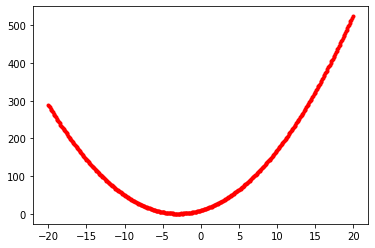

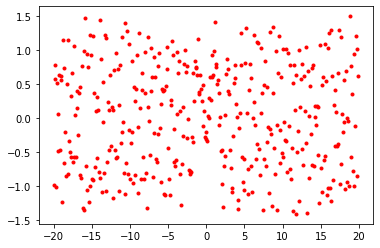

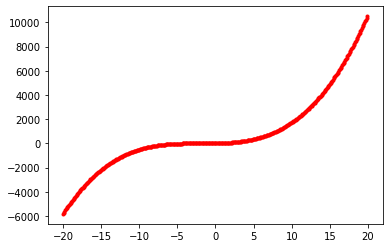

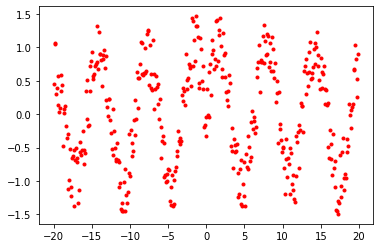

In [21]:
plt.plot(x,y1,'r.')
plt.show()

plt.plot(x,y2,'r.')
plt.show()

plt.plot(x,y3,'r.')
plt.show()

plt.plot(x,y4,'r.')
plt.show()

In [22]:
Trow = engine.execute('select * from Test_Table')
for row in Trow:
    print(row)

2021-11-19 13:29:51,955 INFO sqlalchemy.engine.Engine select * from Test_Table
2021-11-19 13:29:51,957 INFO sqlalchemy.engine.Engine [raw sql] ()
(1148, -18.2, -0.24138825, 0.36344455, 'Y49')
(1149, -17.9, 221.71954, 0.0, '0')
(1150, 5.4, -0.9854407, 0.0, '0')
(1151, 3.9, 1.0771449, 0.0, '0')
(1152, 4.2, 9627.307, 0.0, '0')
(1153, 9.4, 1482.6057, 0.0, '0')
(1154, -13.7, -4035.768, 0.0, '0')
(1155, -12.1, 65.28255, 0.0, '0')
(1156, 18.7, -0.013622354, 0.135376666, 'Y49')
(1157, -19.8, 0.93451816, 0.12084443, 'Y49')
(1158, -11.2, -1.6996471, 0.0, '0')
(1159, -5.1, -994.594, 0.0, '0')
(1160, 1.8, 23.44915, 0.40915000000000035, 'Y20')
(1161, -16.8, 190.64813, 0.20813000000001125, 'Y20')
(1162, 10.7, -2445.7498, 0.0, '0')
(1163, -2.9, -0.68998903, 0.03901096999999998, 'Y26')
(1164, -13.7, 115.65897, 0.0, '0')
(1165, 6.5, -0.18290174, 0.39802173, 'Y49')
(1166, 5.2, 67.61878, 0.3787800000000061, 'Y20')
(1167, 5.0, 0.42162812, 0.55397988, 'Y8')
(1168, 7.4, 830.4324, 0.0, '0')
(1169, -13.2, -14

In [24]:
col_list

['X', 'Y20', 'Y8', 'Y26', 'Y49']